In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('data.csv')

In [5]:
print(data['pokedex_number'], data['generation'])

0        1
1      801
2        2
3        3
4        4
      ... 
796    796
797    797
798    798
799    799
800    800
Name: pokedex_number, Length: 801, dtype: int64 0      1
1      7
2      1
3      1
4      1
      ..
796    7
797    7
798    7
799    7
800    7
Name: generation, Length: 801, dtype: int64


In [3]:
null_stats = pd.DataFrame({
    'non_null_count': data.count(),
    'null_count': data.isna().sum(),
    'dtype': data.dtypes
})
print(null_stats)

                   non_null_count  null_count    dtype
abilities                     801           0   object
against_bug                   801           0  float64
against_dark                  801           0  float64
against_dragon                801           0  float64
against_electric              801           0  float64
against_fairy                 801           0  float64
against_fight                 801           0  float64
against_fire                  801           0  float64
against_flying                801           0  float64
against_ghost                 801           0  float64
against_grass                 801           0  float64
against_ground                801           0  float64
against_ice                   801           0  float64
against_normal                801           0  float64
against_poison                801           0  float64
against_psychic               801           0  float64
against_rock                  801           0  float64
against_st

In [3]:
def cat(df, spec):
    table = df.pivot_table(index=spec, columns='is_legendary', aggfunc='size', fill_value=0)

    cat = table.index
    status = table.columns
    n_cat = len(cat)
    width = 1
    space_between = 3
    x = np.arange(0, n_cat * space_between, space_between)

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, stat in enumerate(status):
        ax.bar(x + i * width, table[stat], width, label=stat, color=['green' if stat == 1 else 'red'])

    ax.set_title('Легендарность покемона', pad=20, fontsize=14)
    ax.set_xlabel(spec, fontsize=12)
    ax.set_ylabel('Количество покемонов', fontsize=12)
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(cat, fontsize=12, rotation=90)
    ax.legend(title='Статус', fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Добавление подписей значений
    for i, stat in enumerate(status):
        for j, value in enumerate(table[stat]):
            ax.text(x[j] + i*width, value + 0.5, str(value), 
                    ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

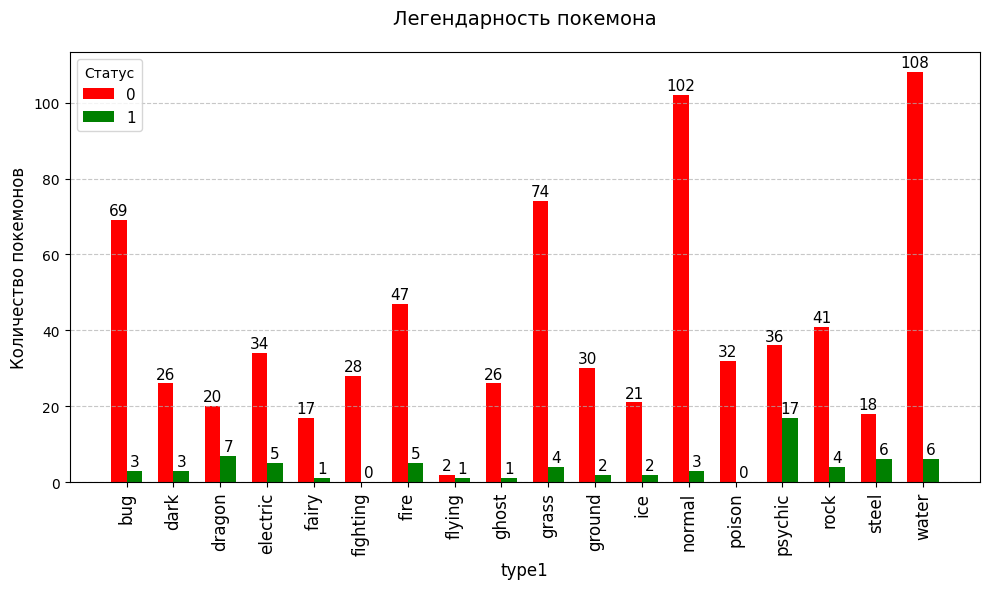

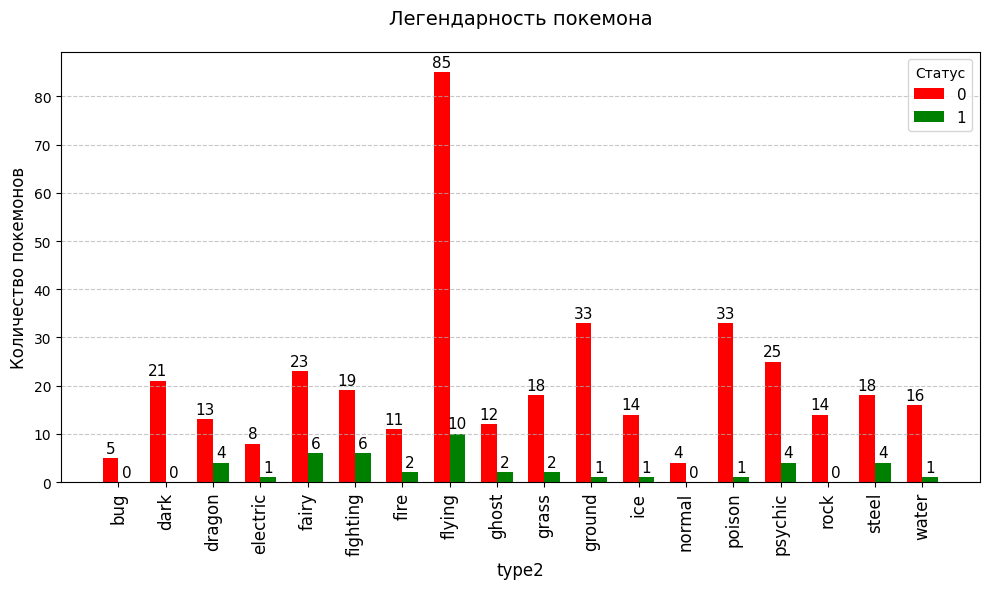

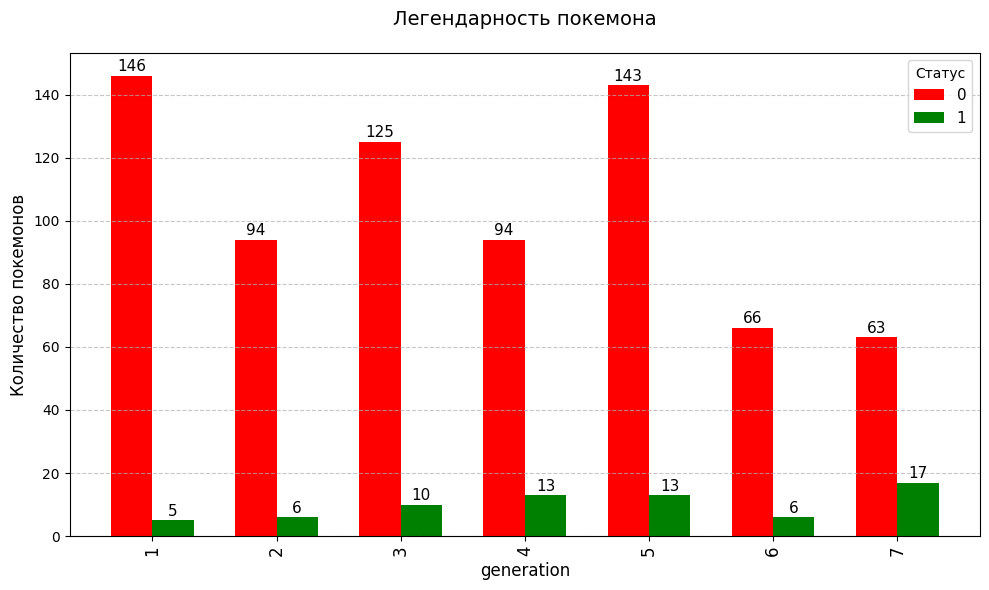

In [16]:
cat_columns = ['type1', 'type2', 'generation']
for i in cat_columns:
    cat(data, i)

In [4]:
def number(df, legend, no_legend, column):
    plt.figure(figsize=(30, 6))
    plt.hist(legend[column], bins=100, edgecolor='black', alpha=1, color='green', label="Легендарный")
    plt.hist(no_legend[column], bins=100, edgecolor='black', alpha=0.5, color='red', label="Нелегендарный")
    plt.xlabel(f"Характеристика {column} покемона")
    plt.ylabel("Количество")
    plt.title(f"Сравнение распределения {column} легендарных и нелегендарных покемонов")
    plt.legend()
    plt.show()


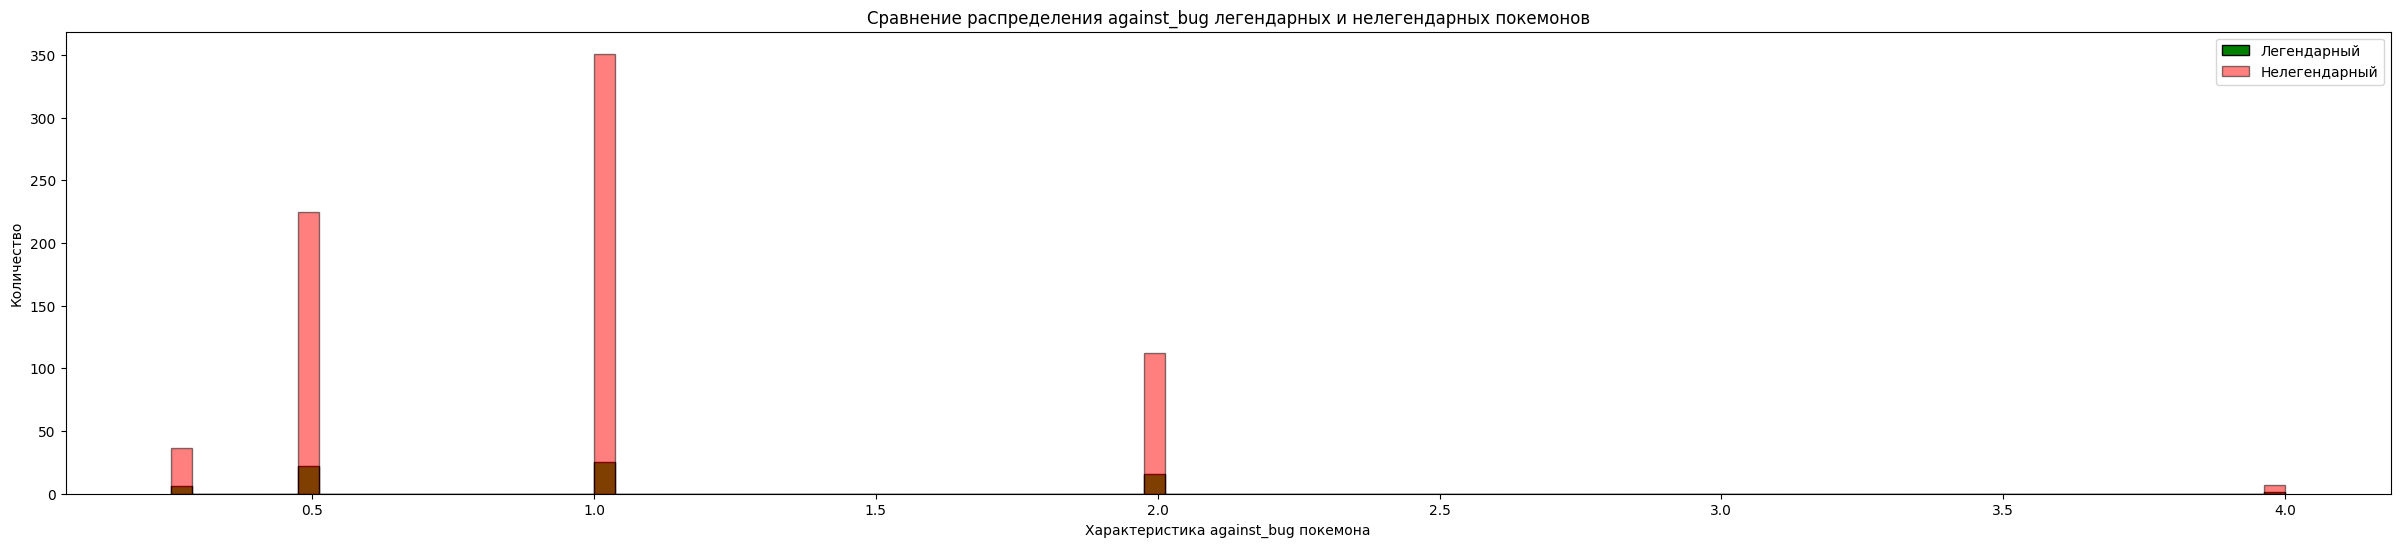

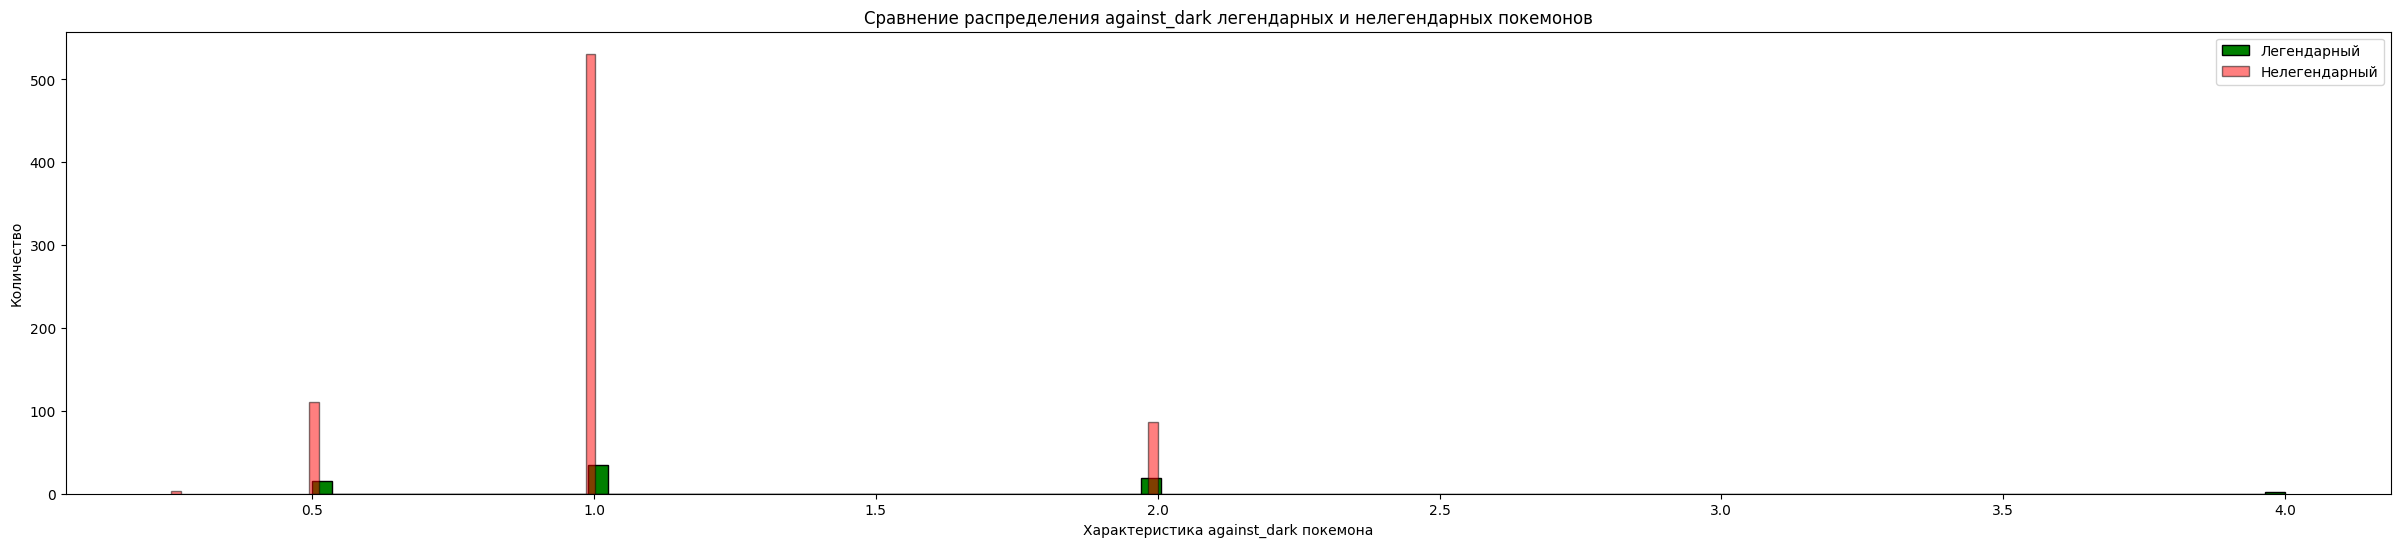

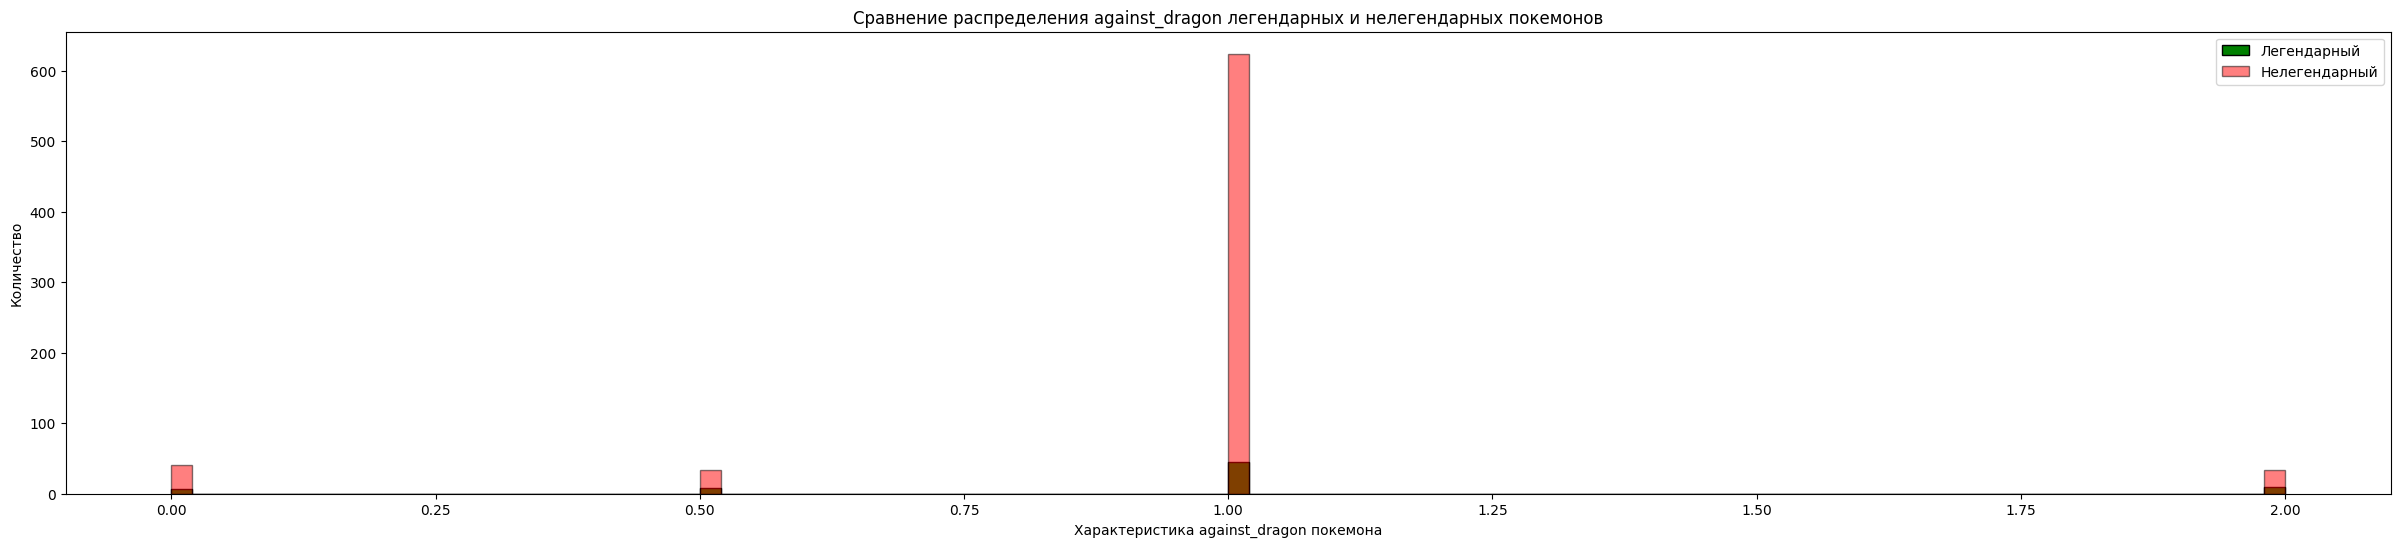

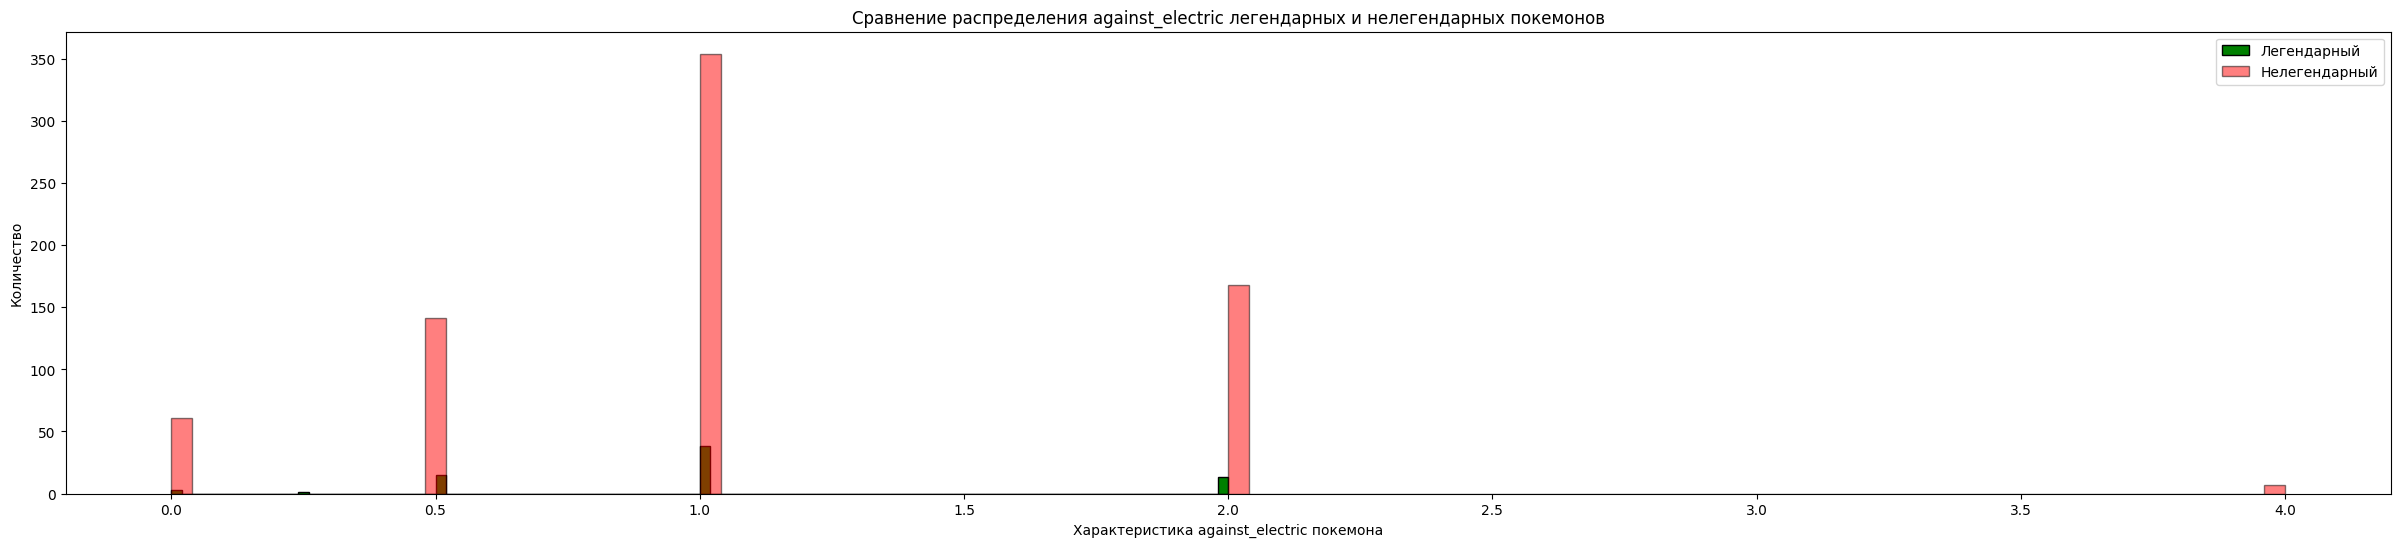

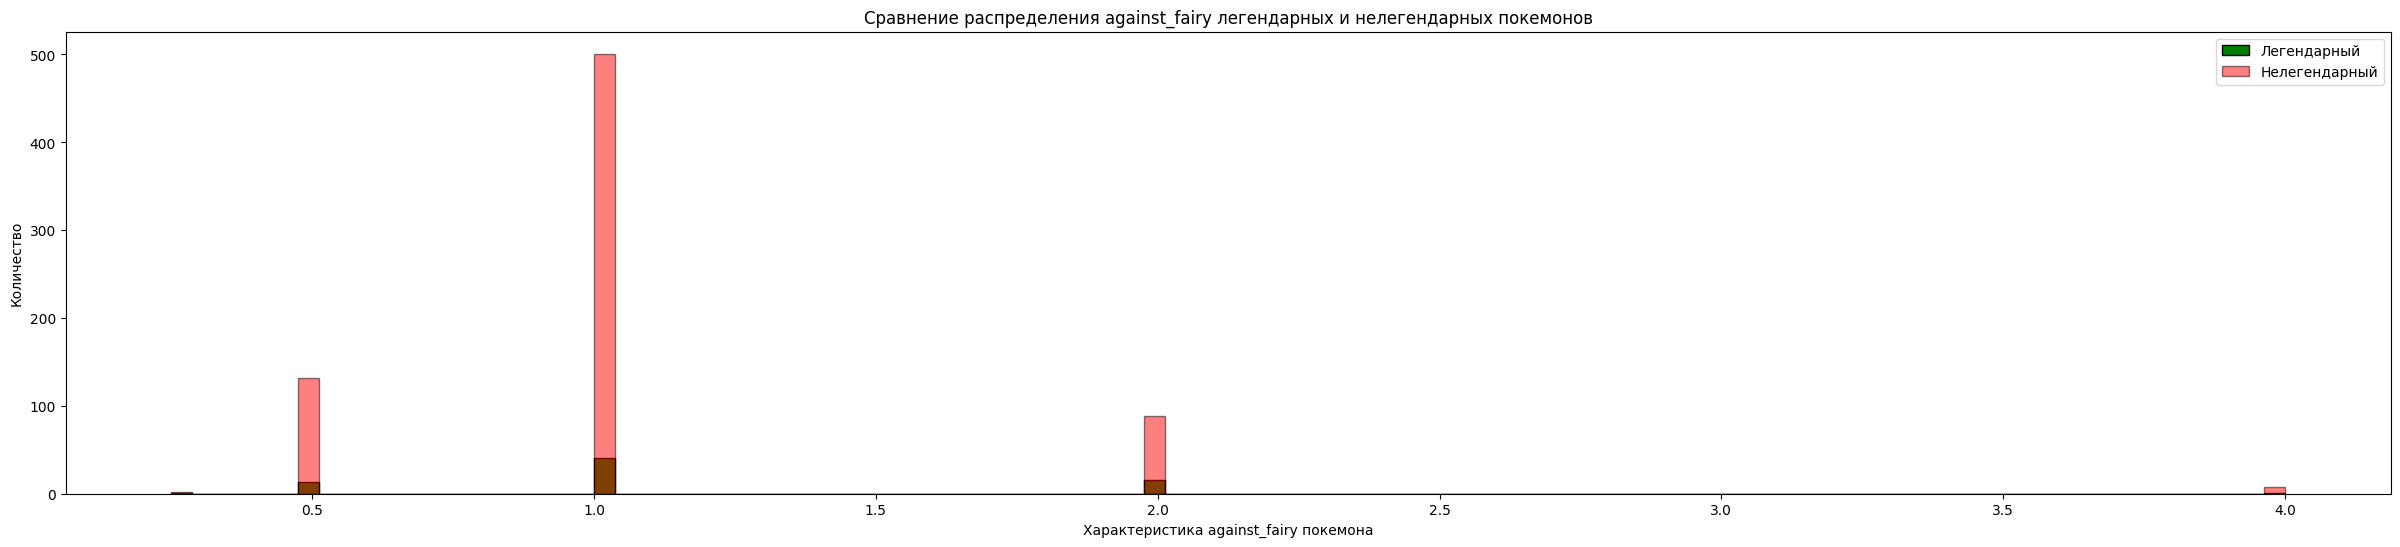

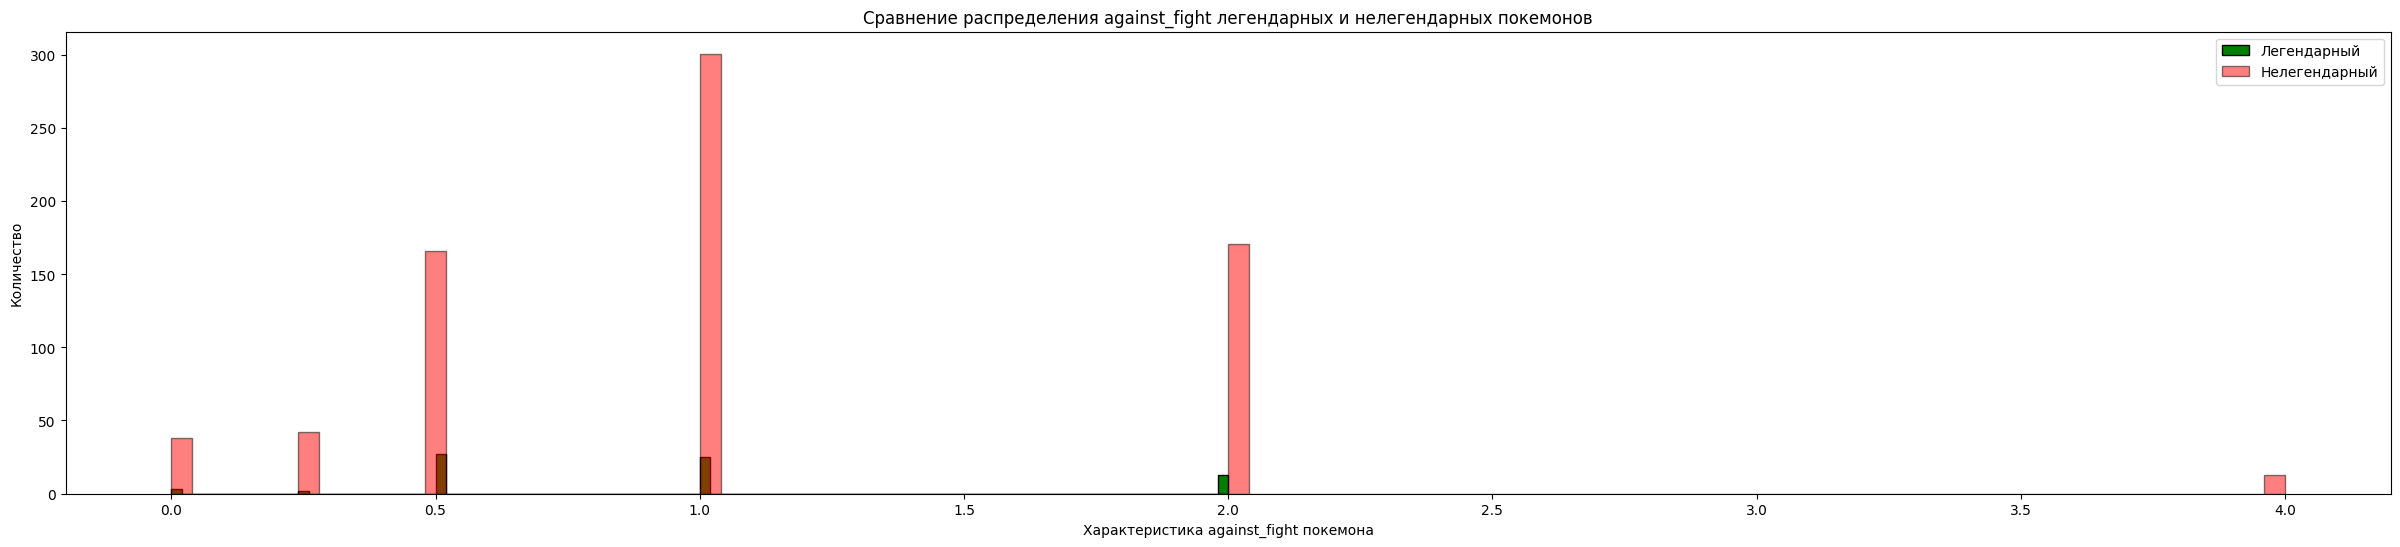

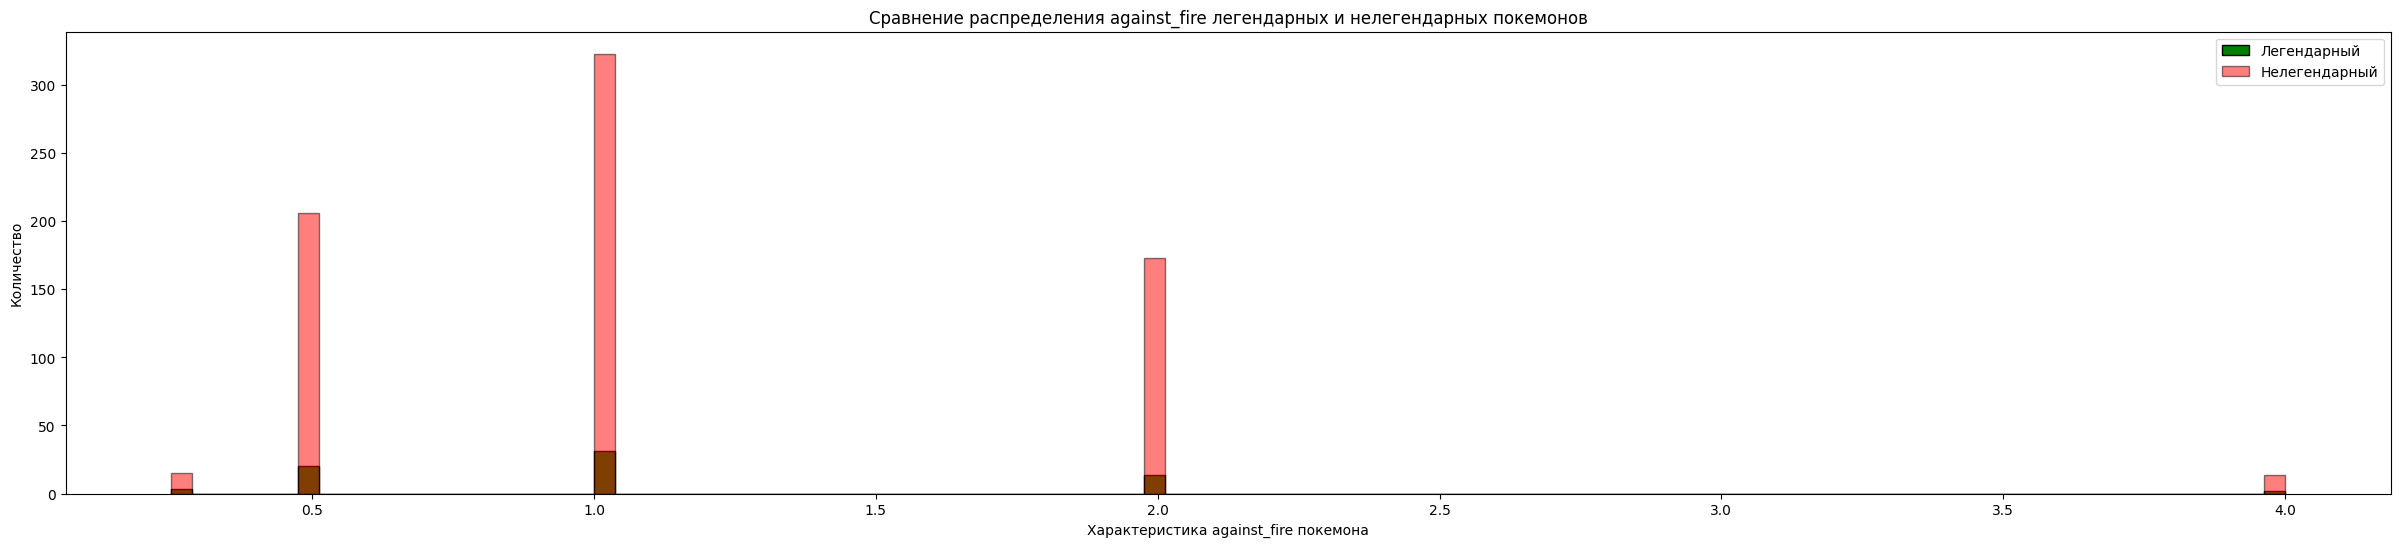

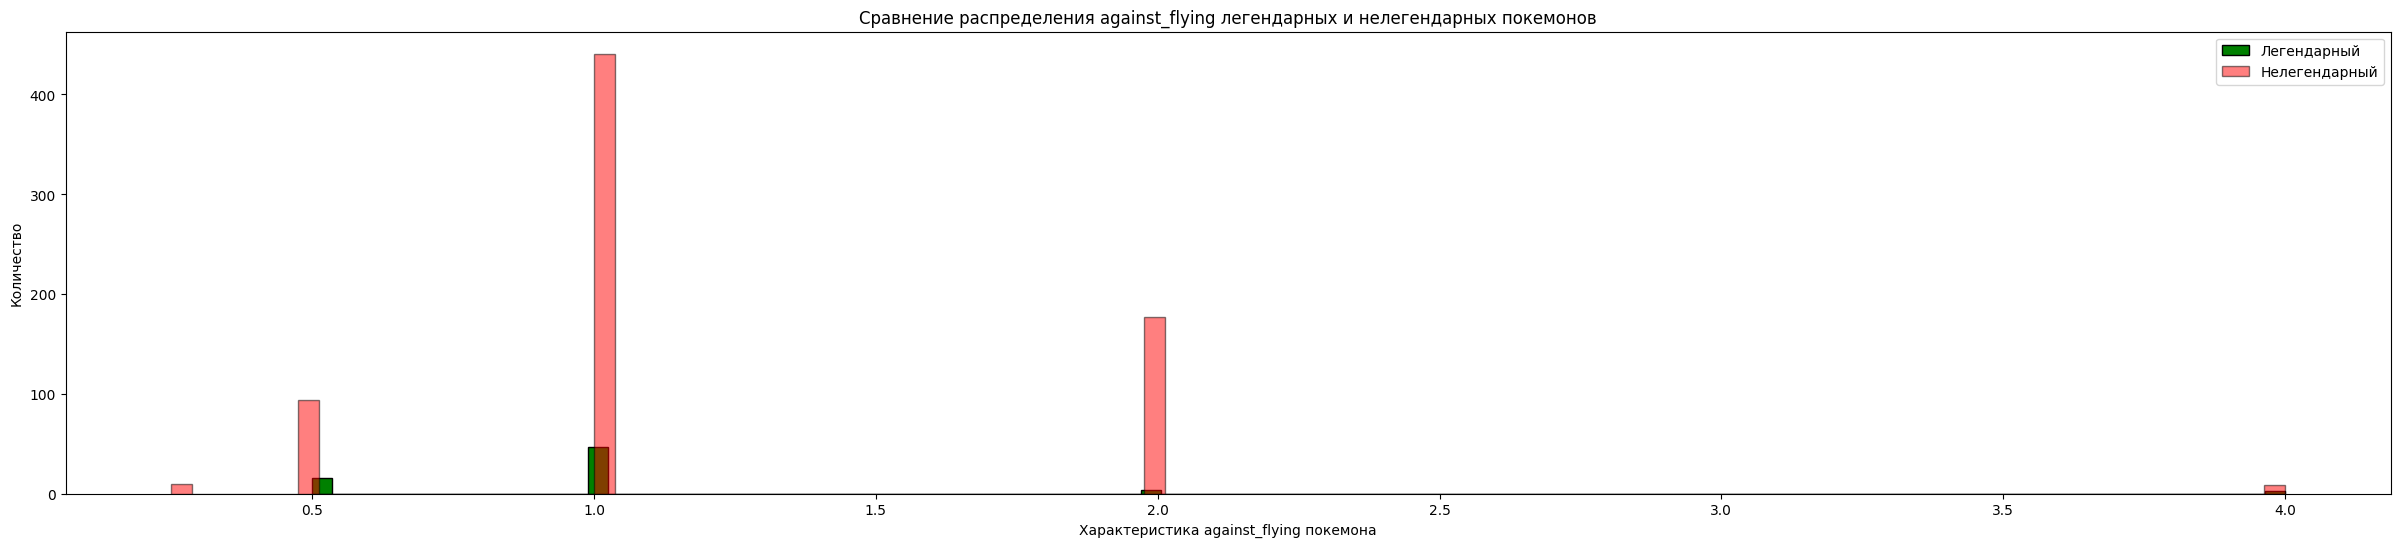

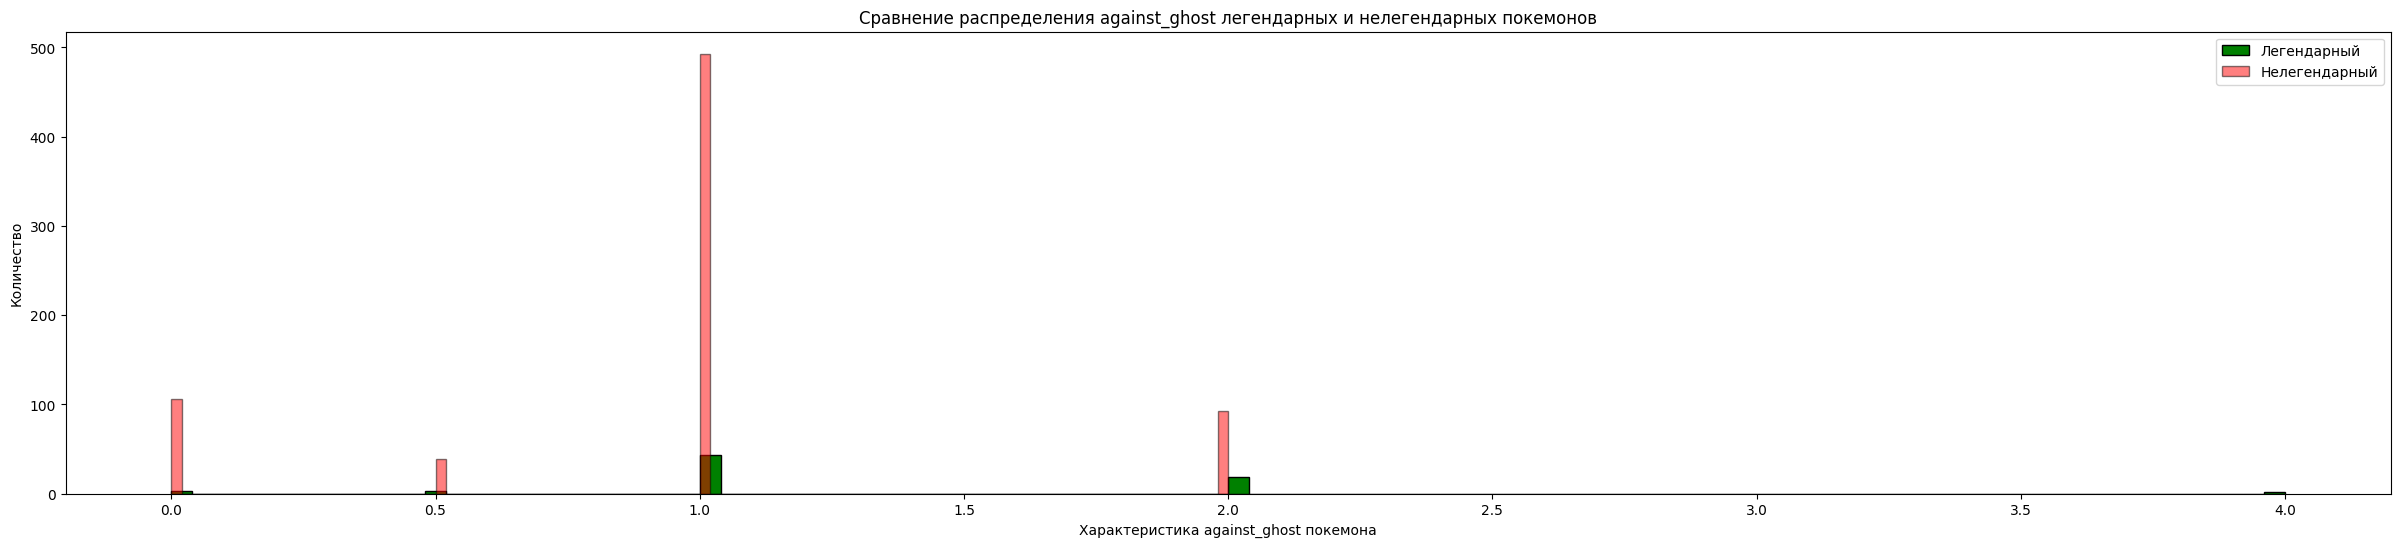

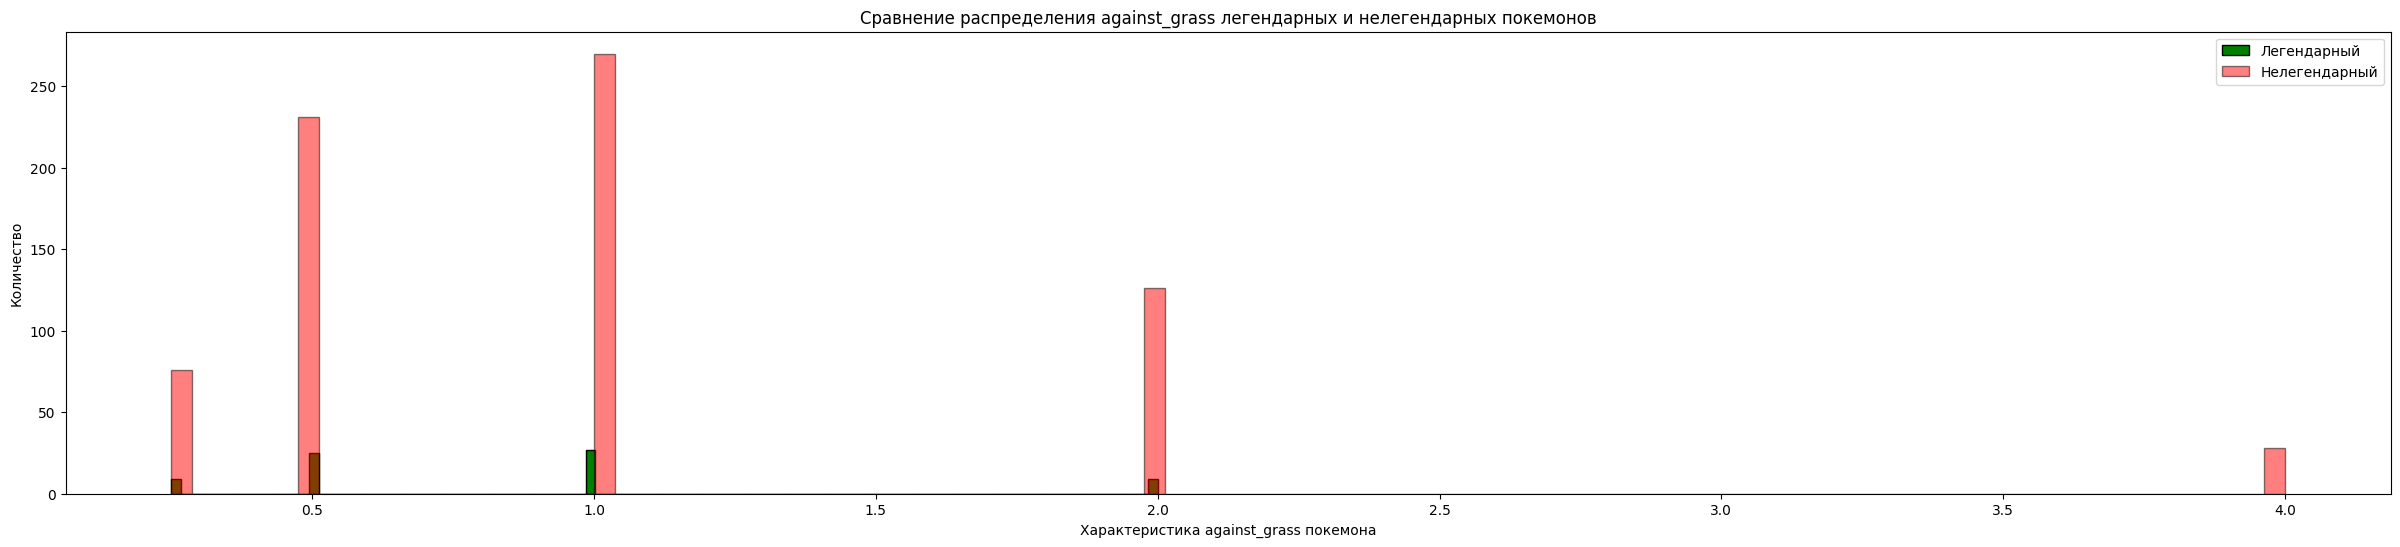

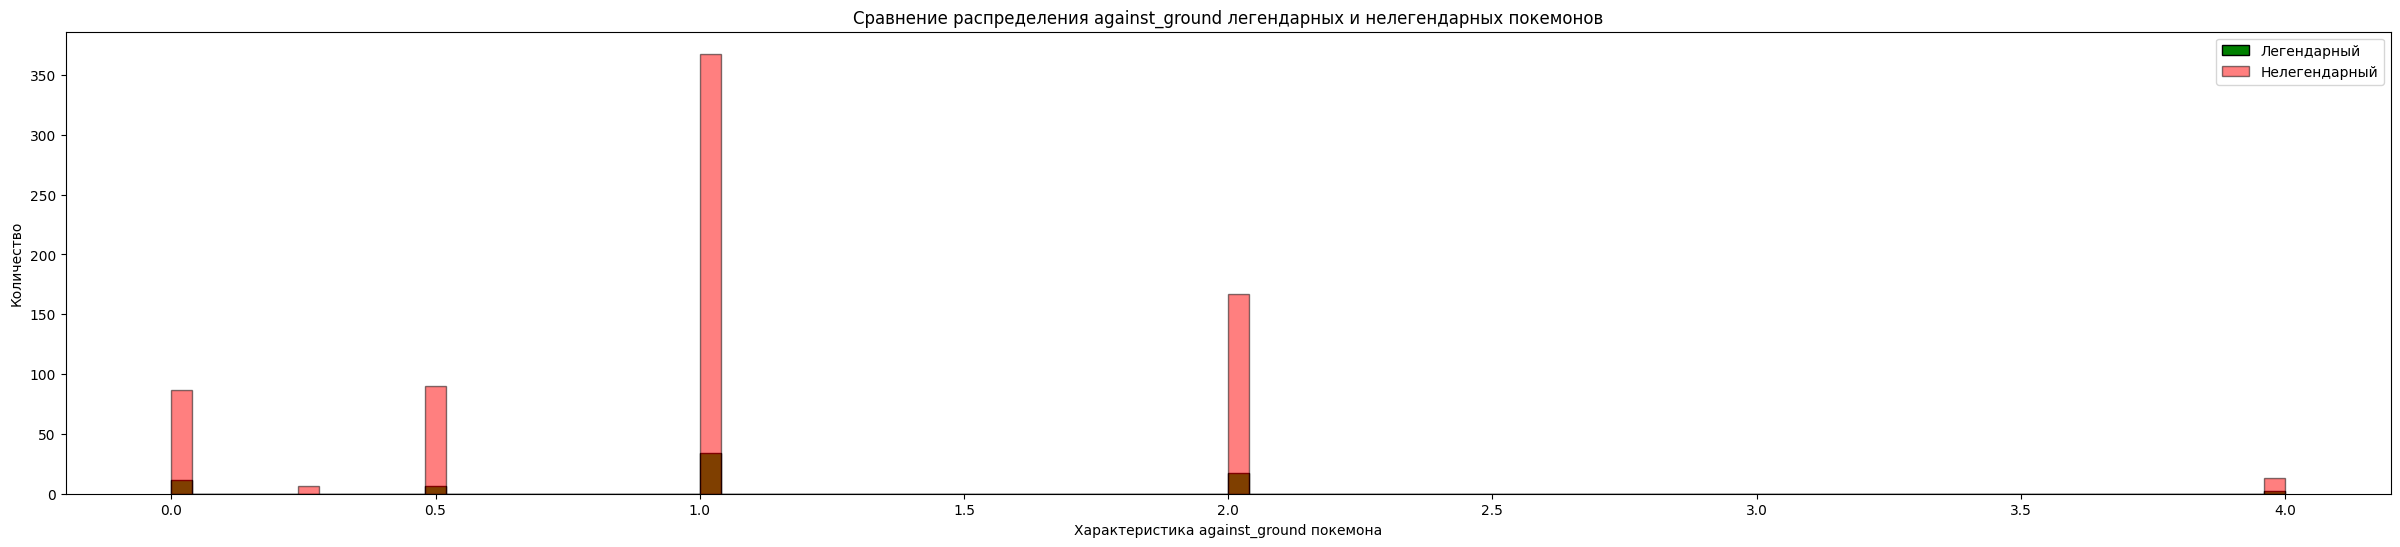

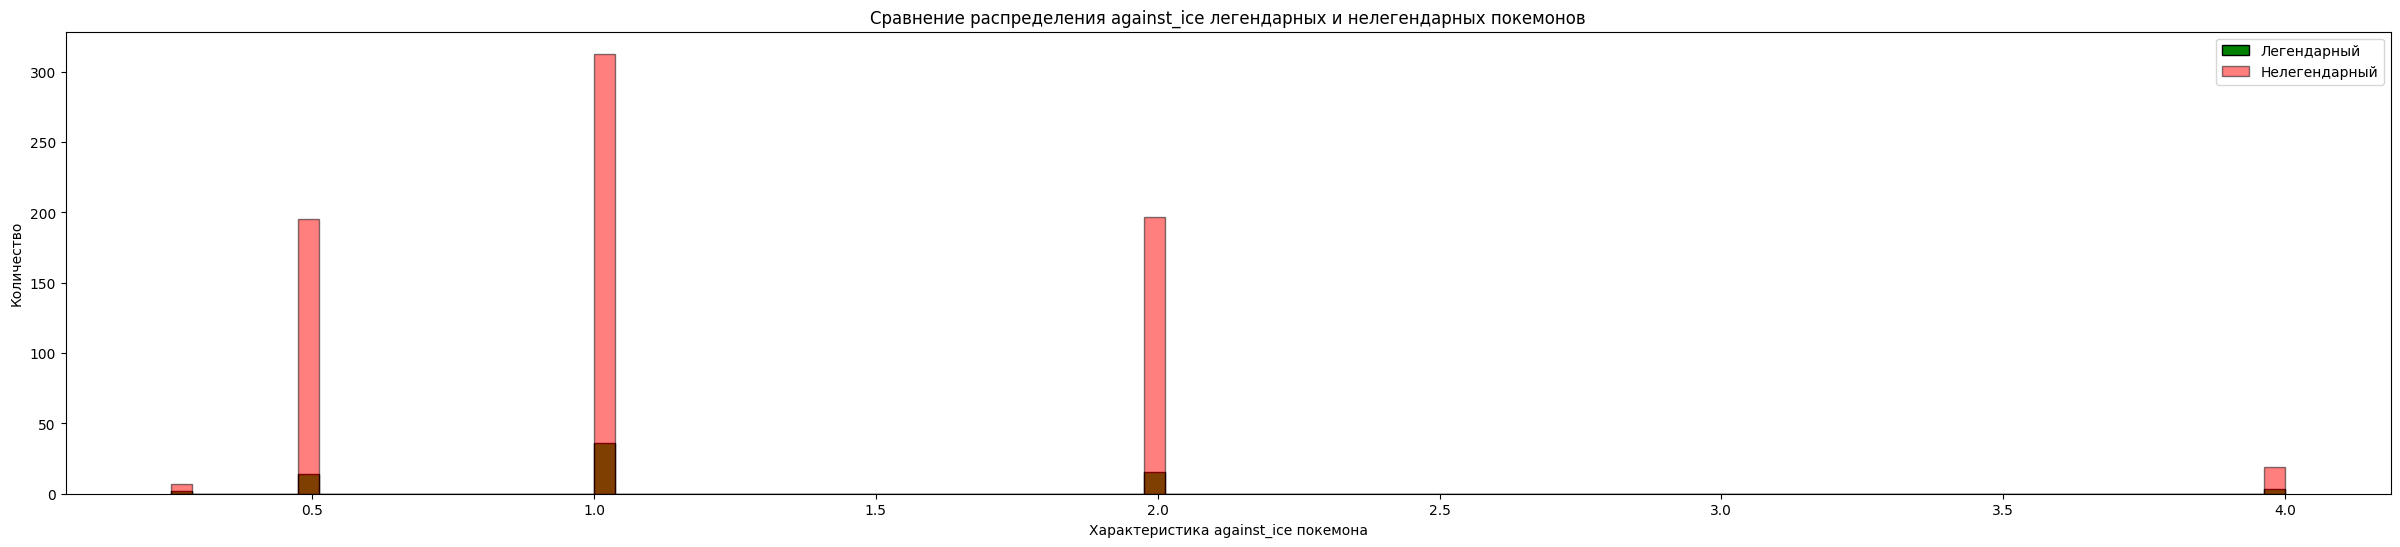

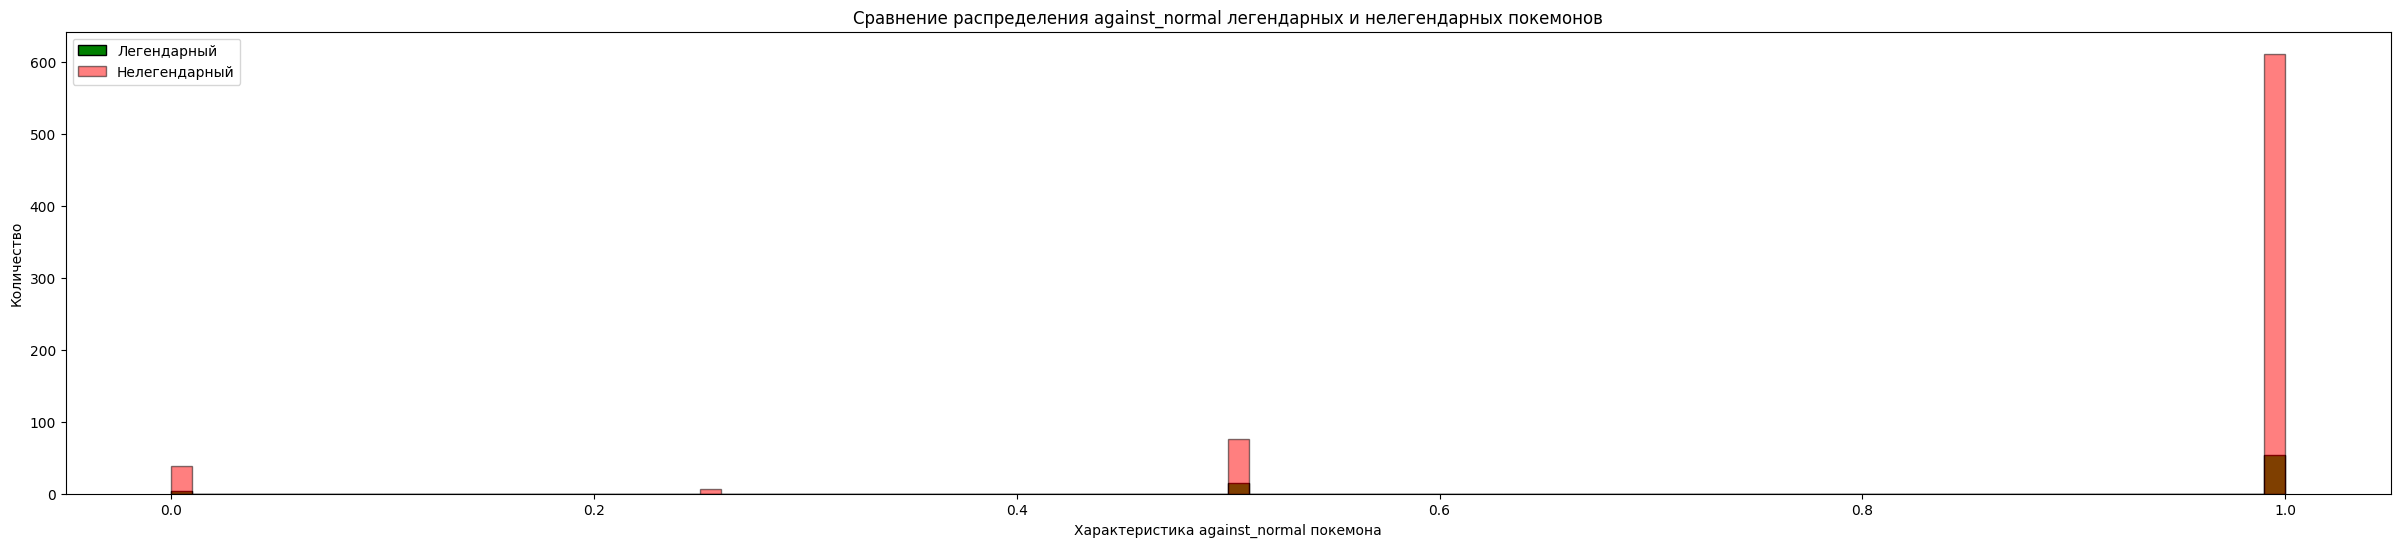

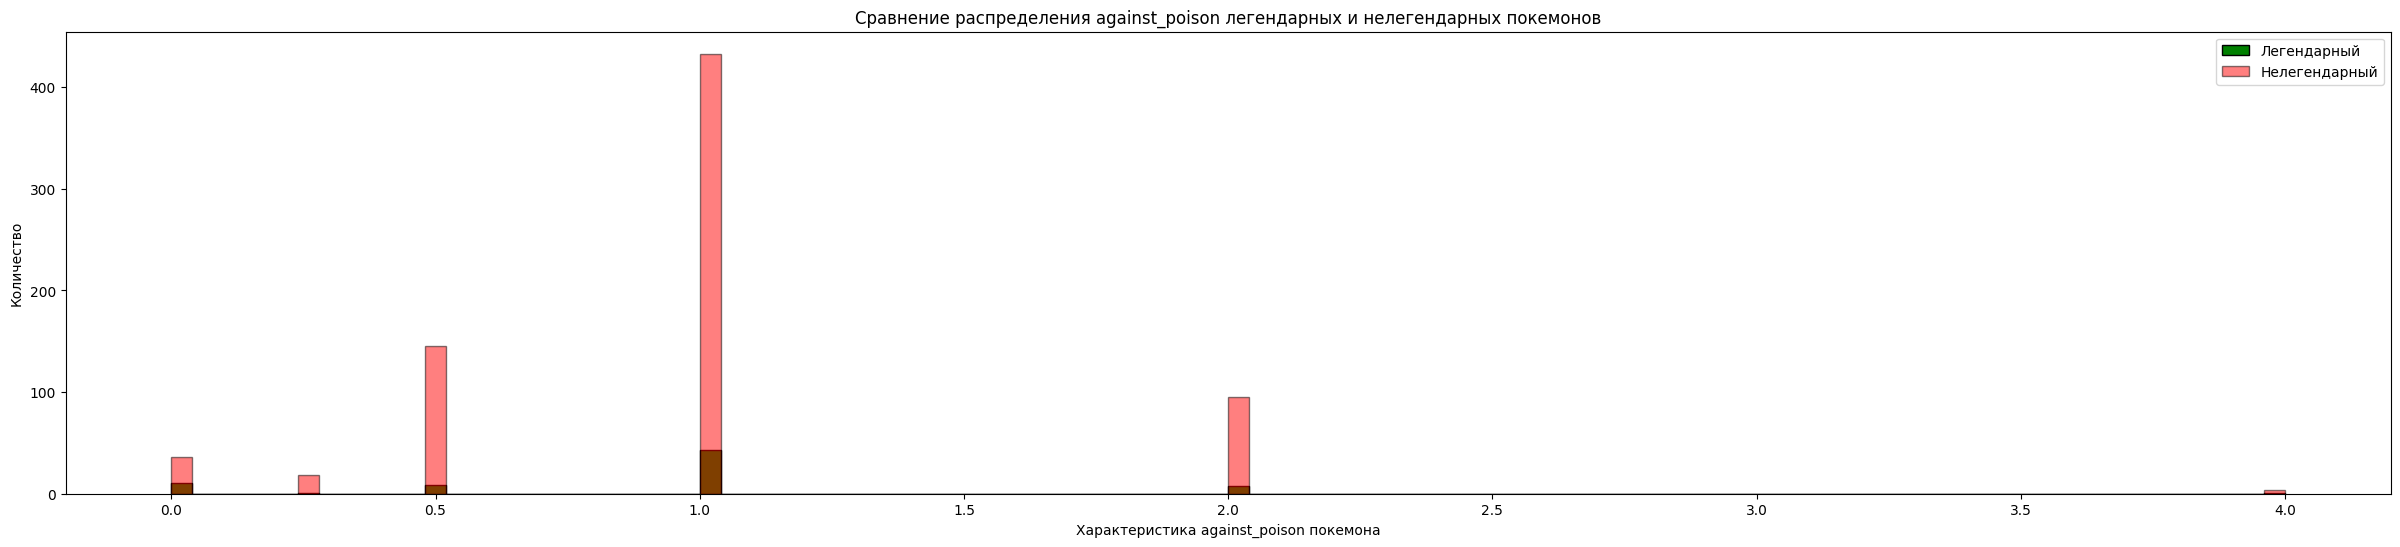

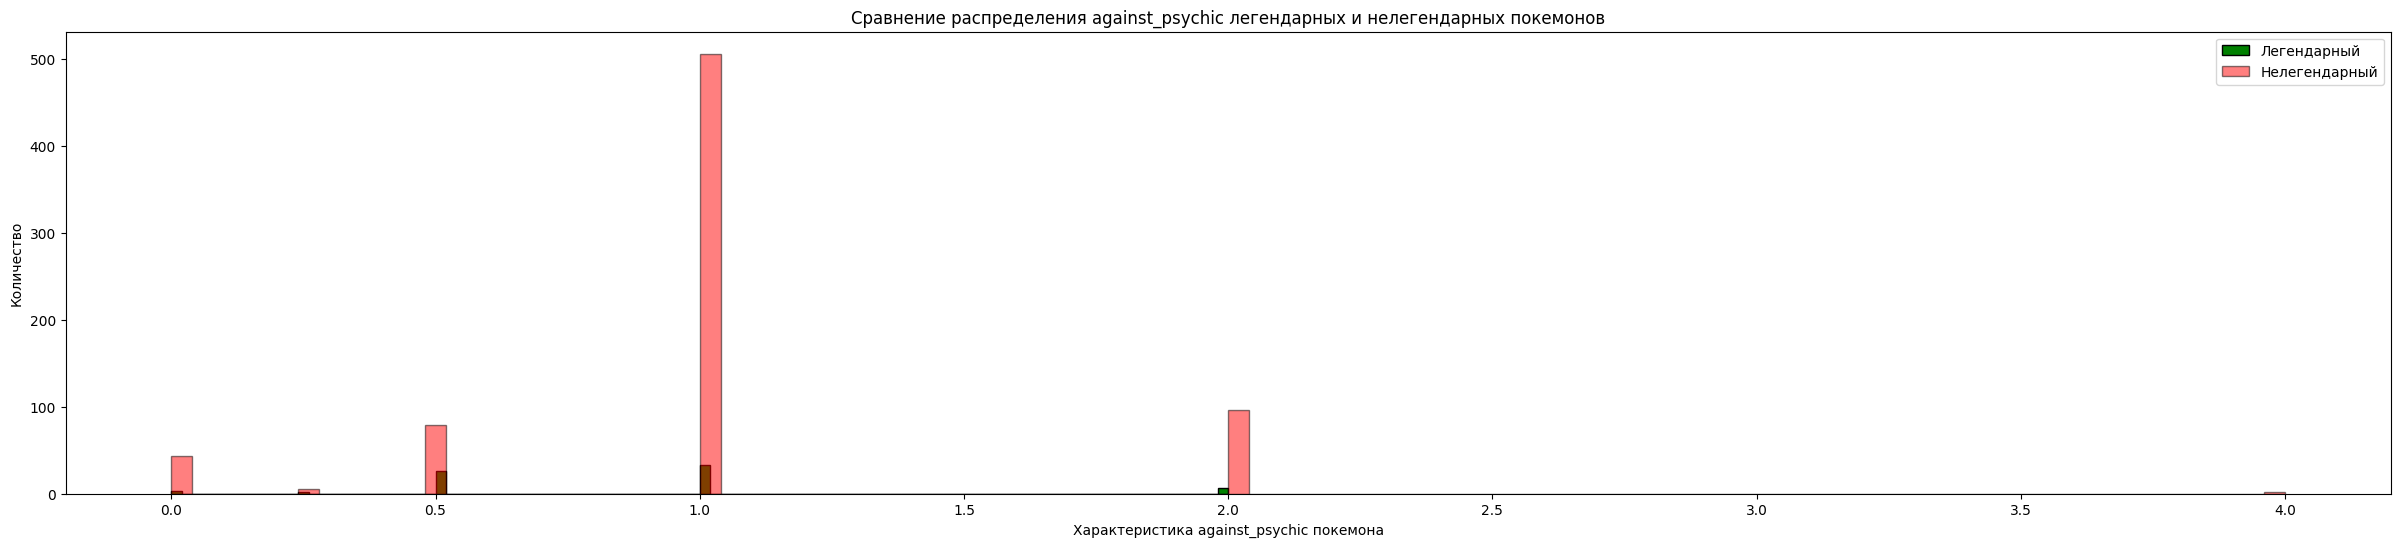

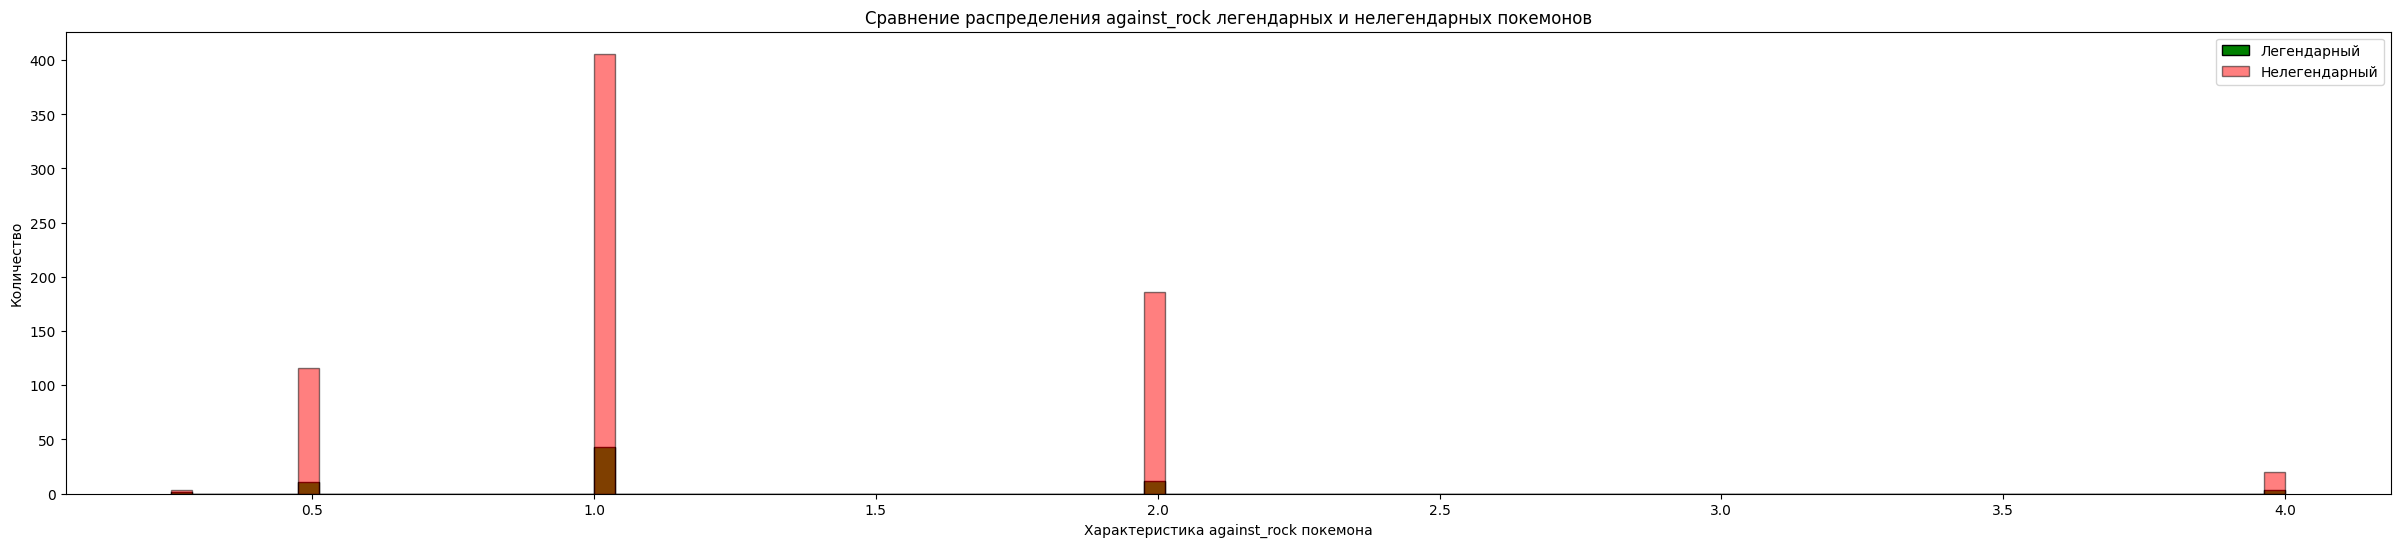

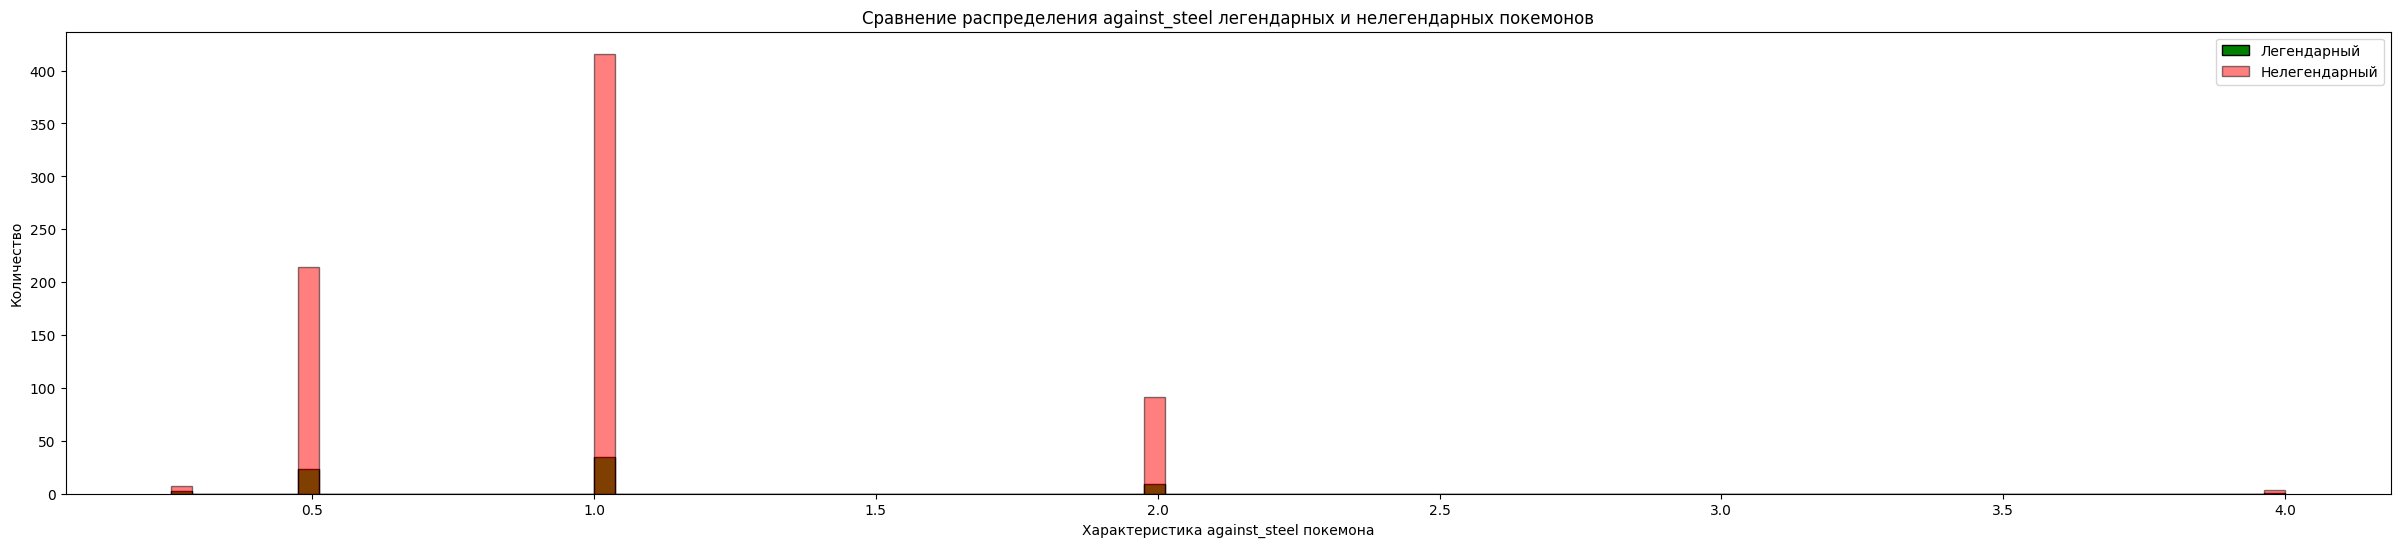

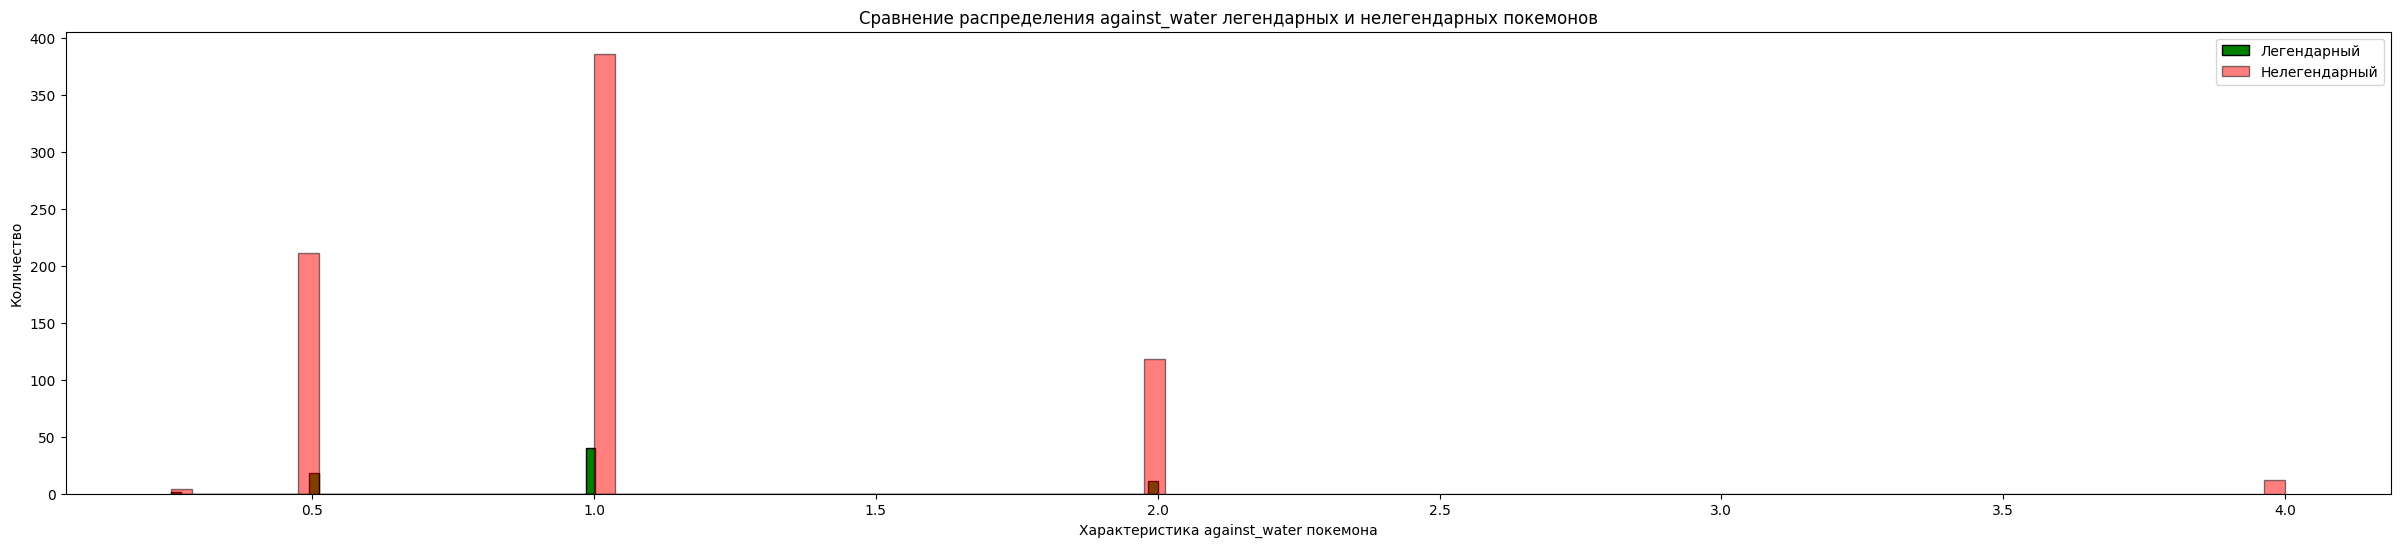

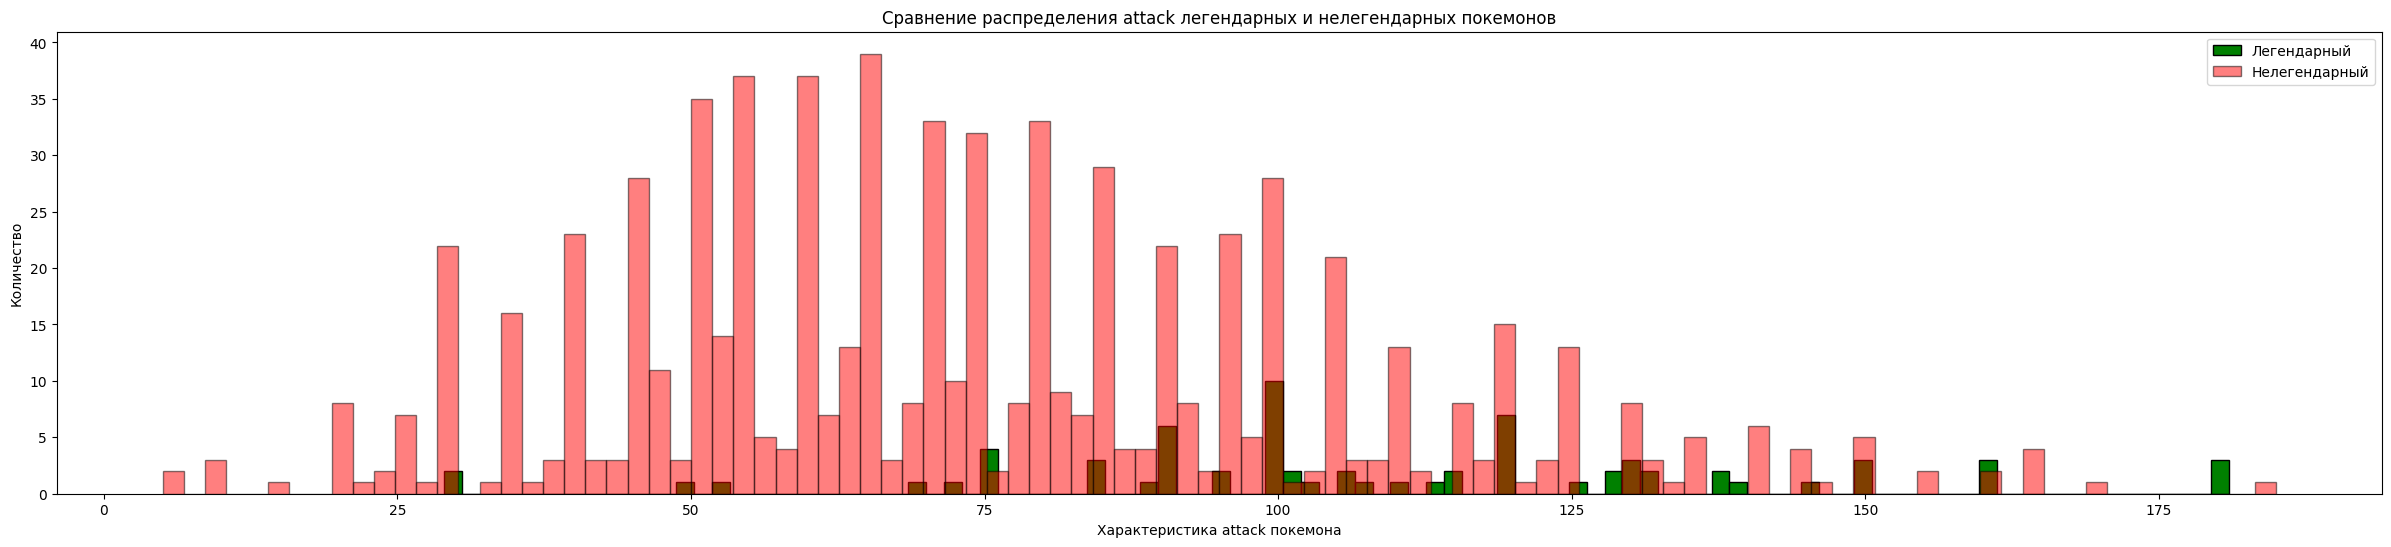

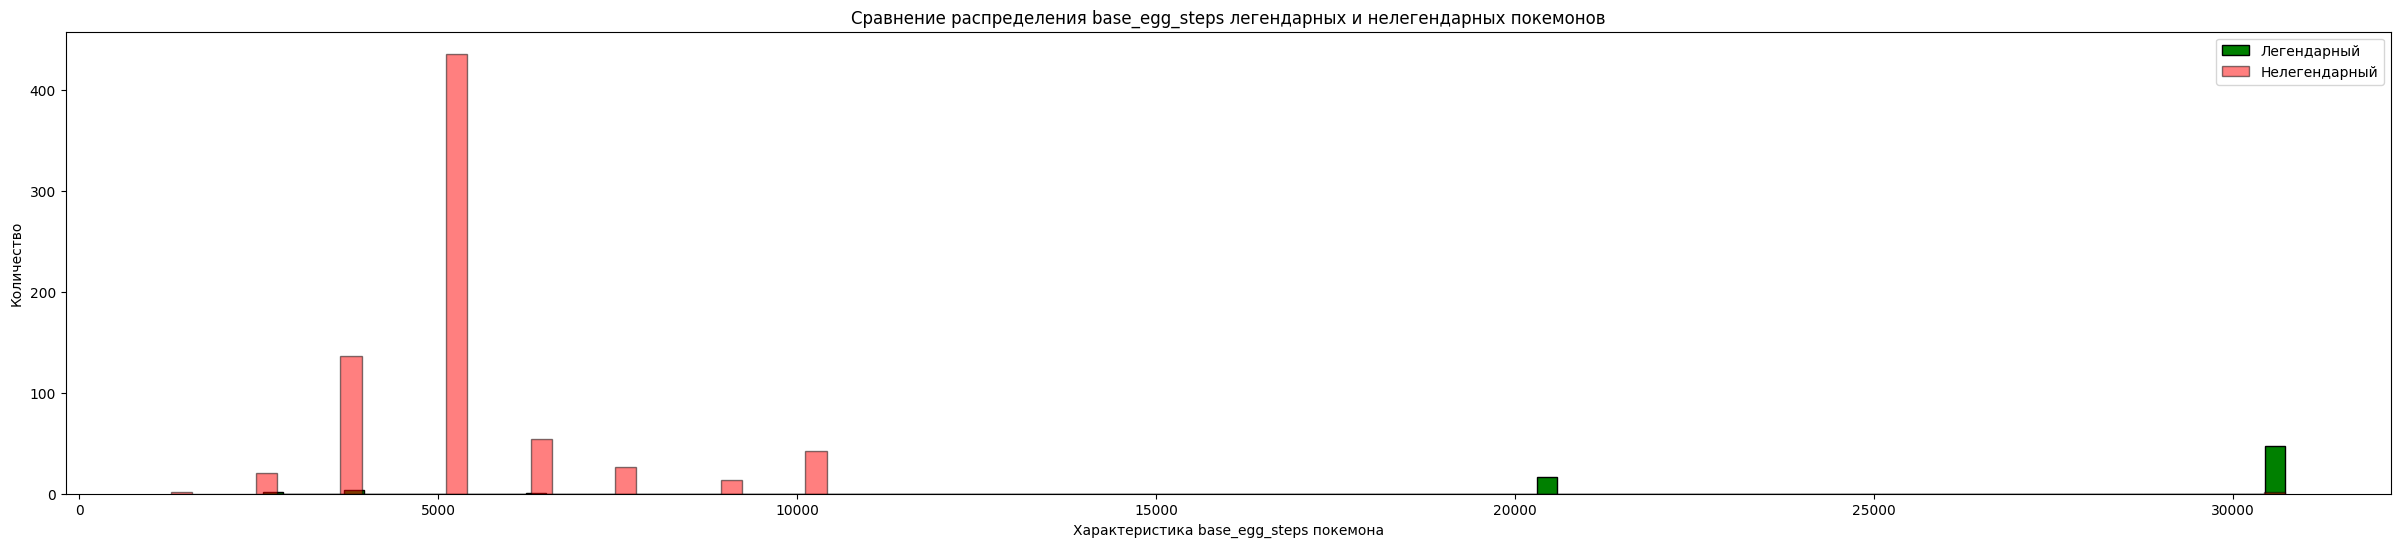

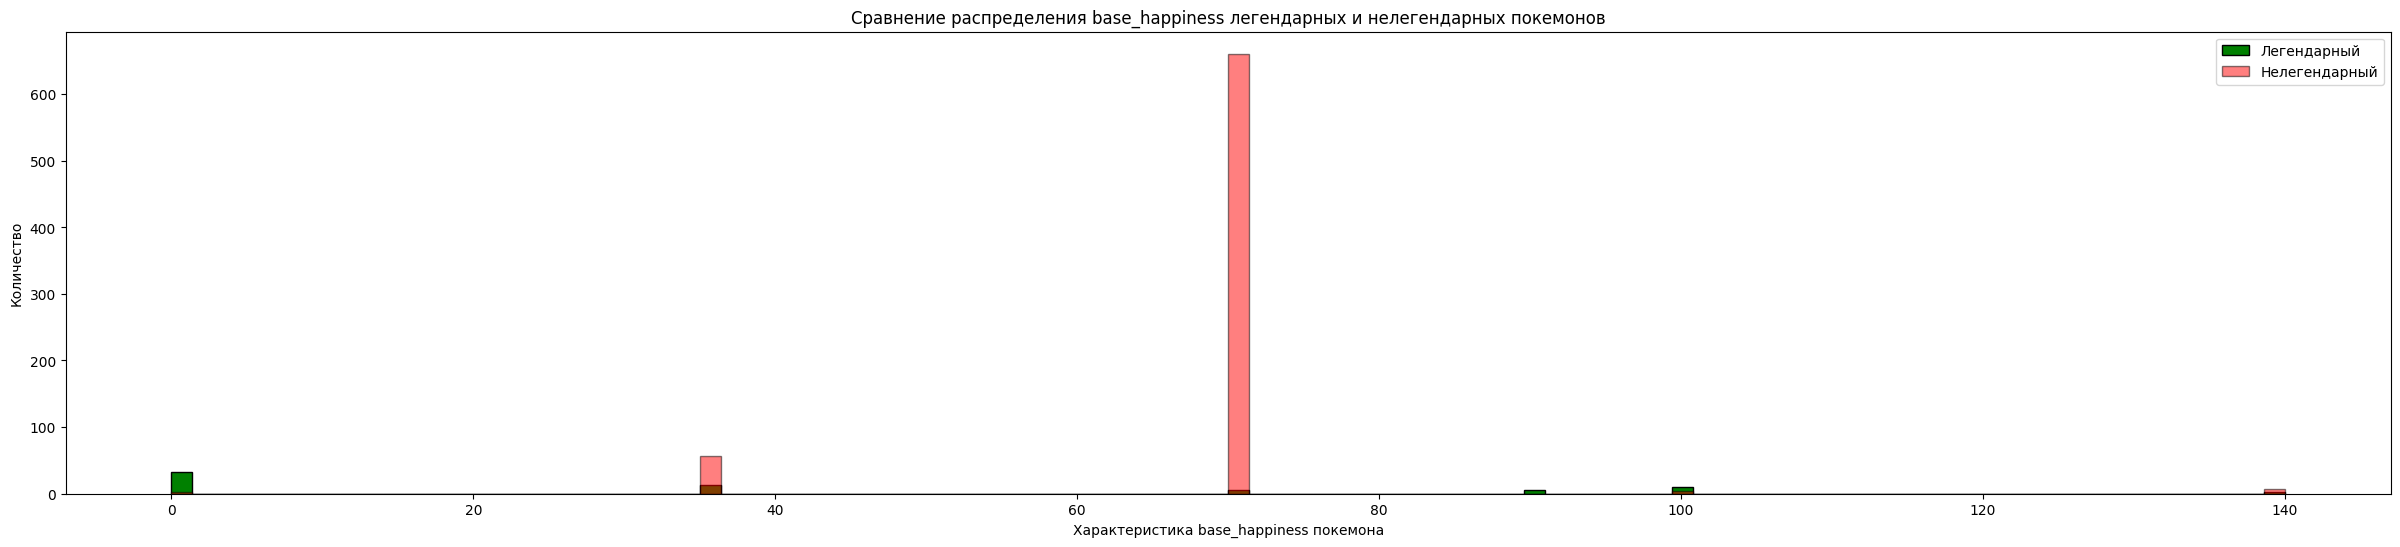

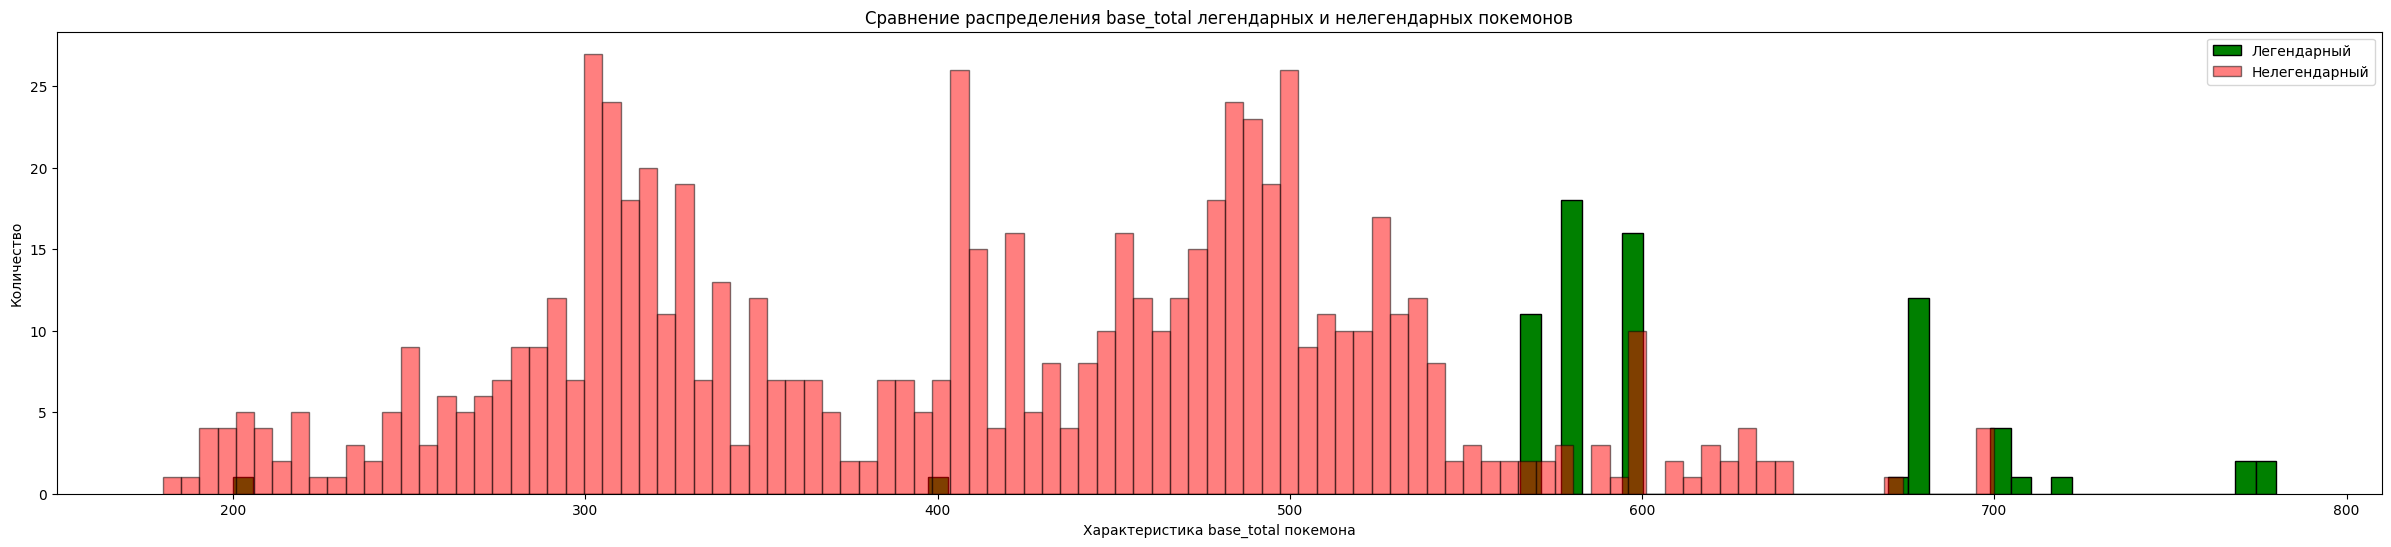

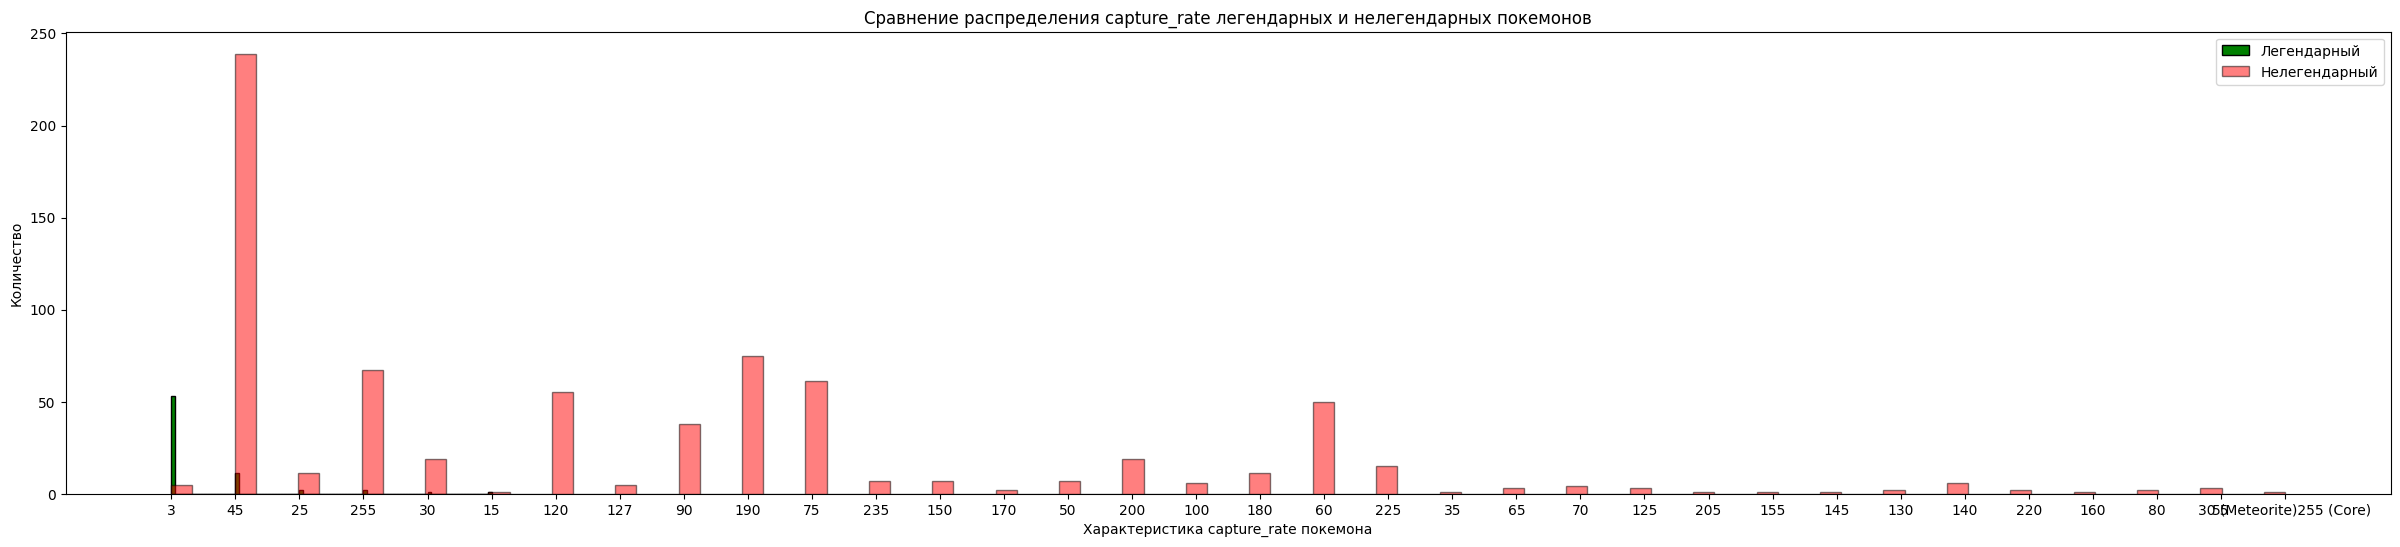

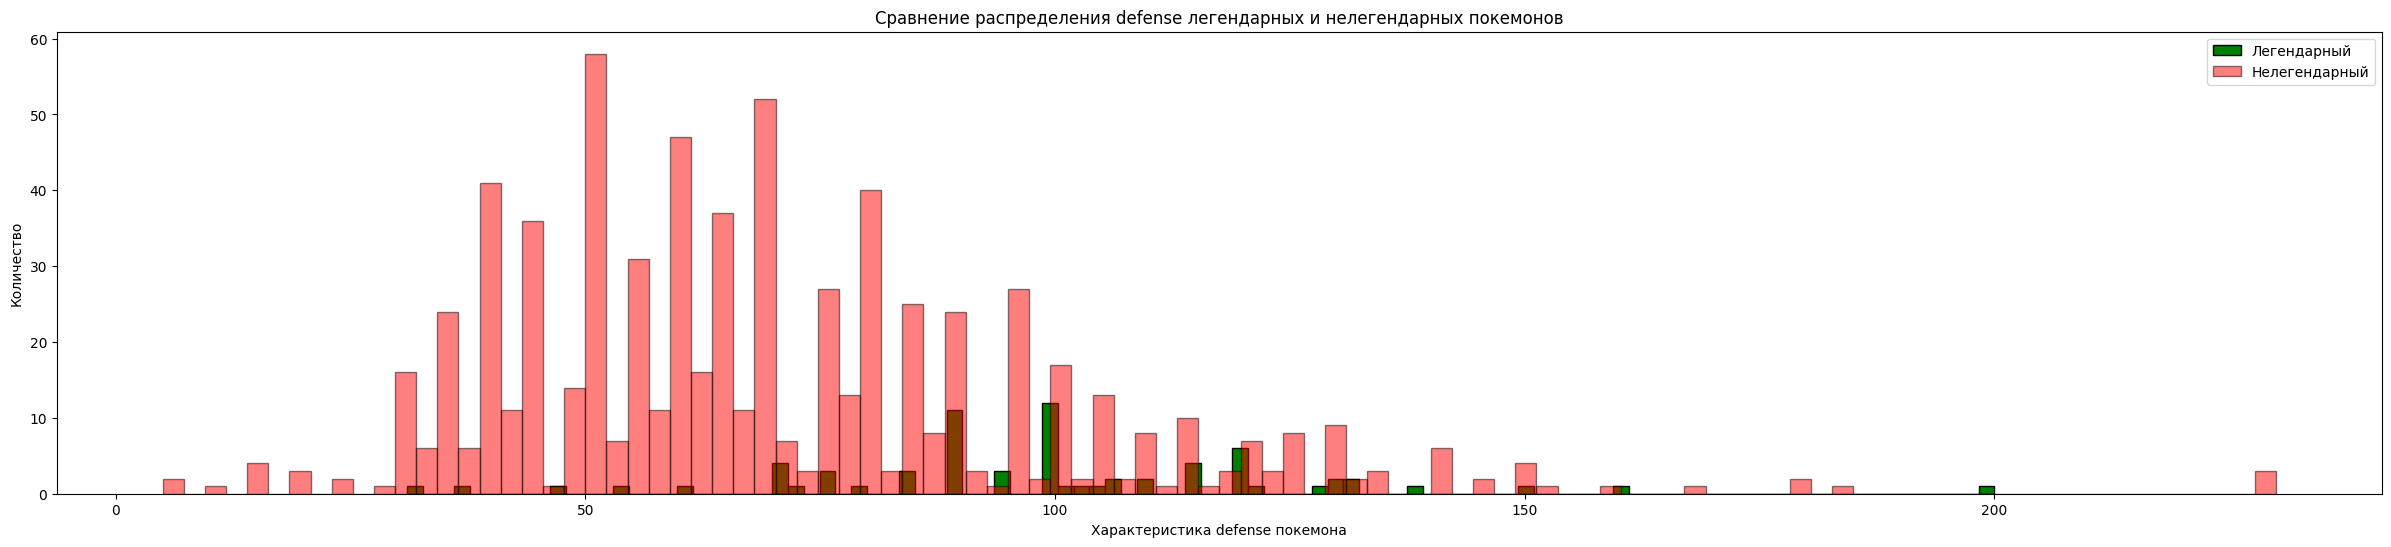

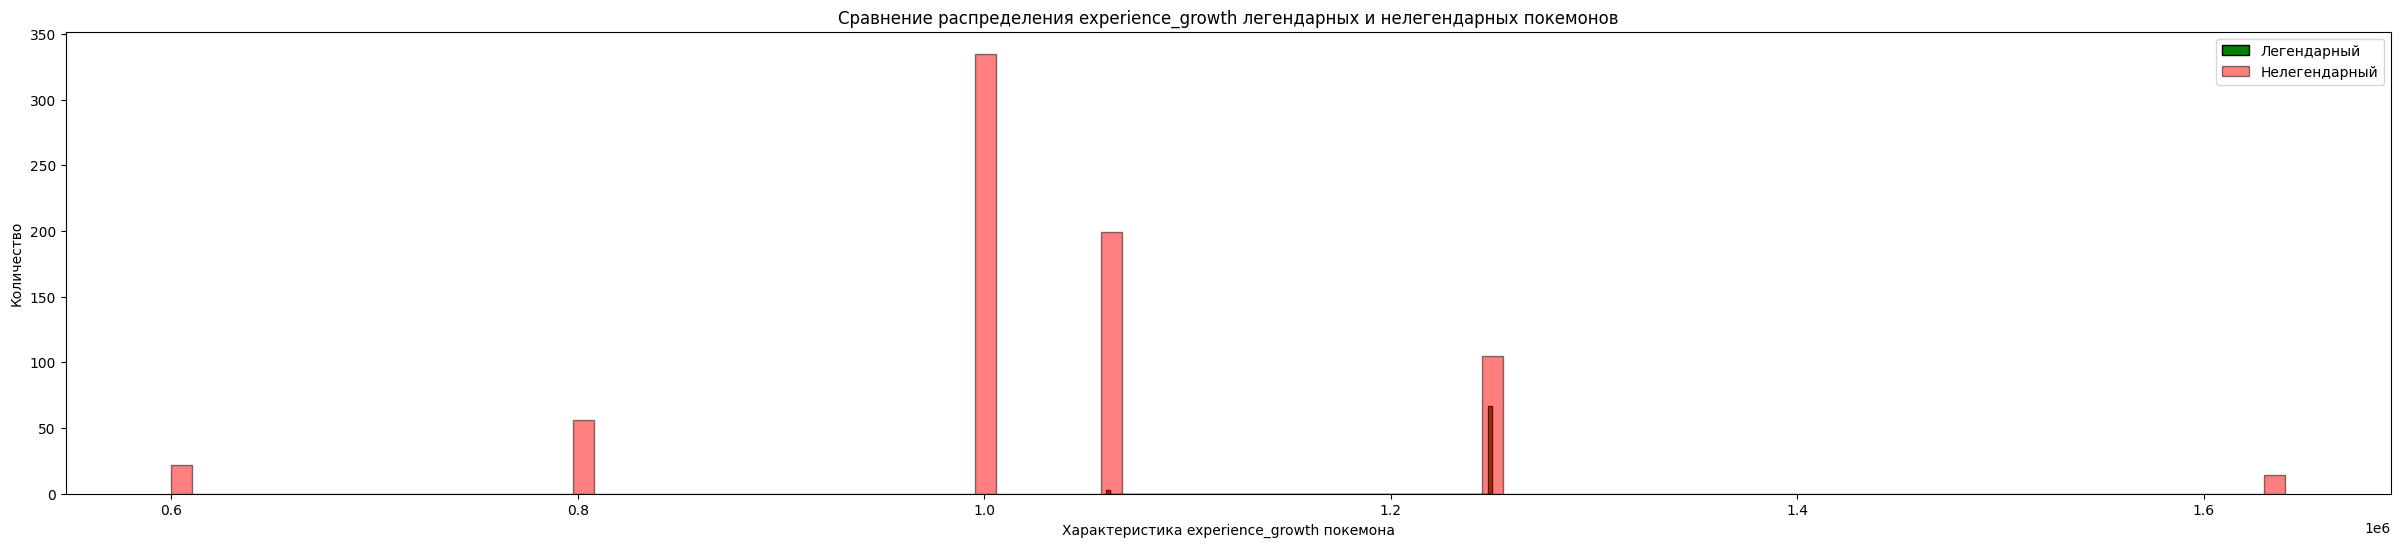

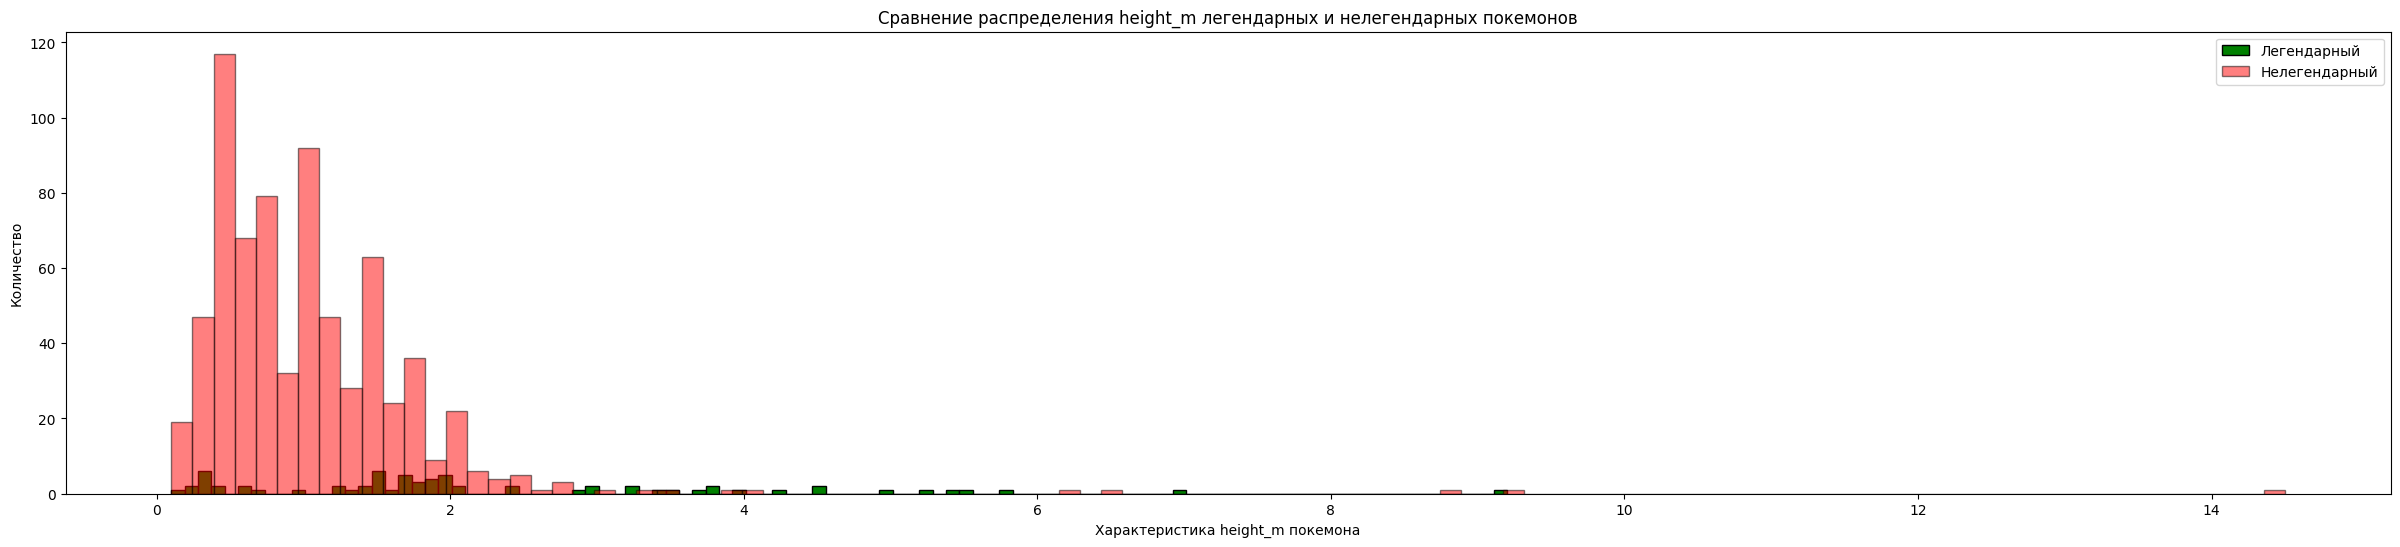

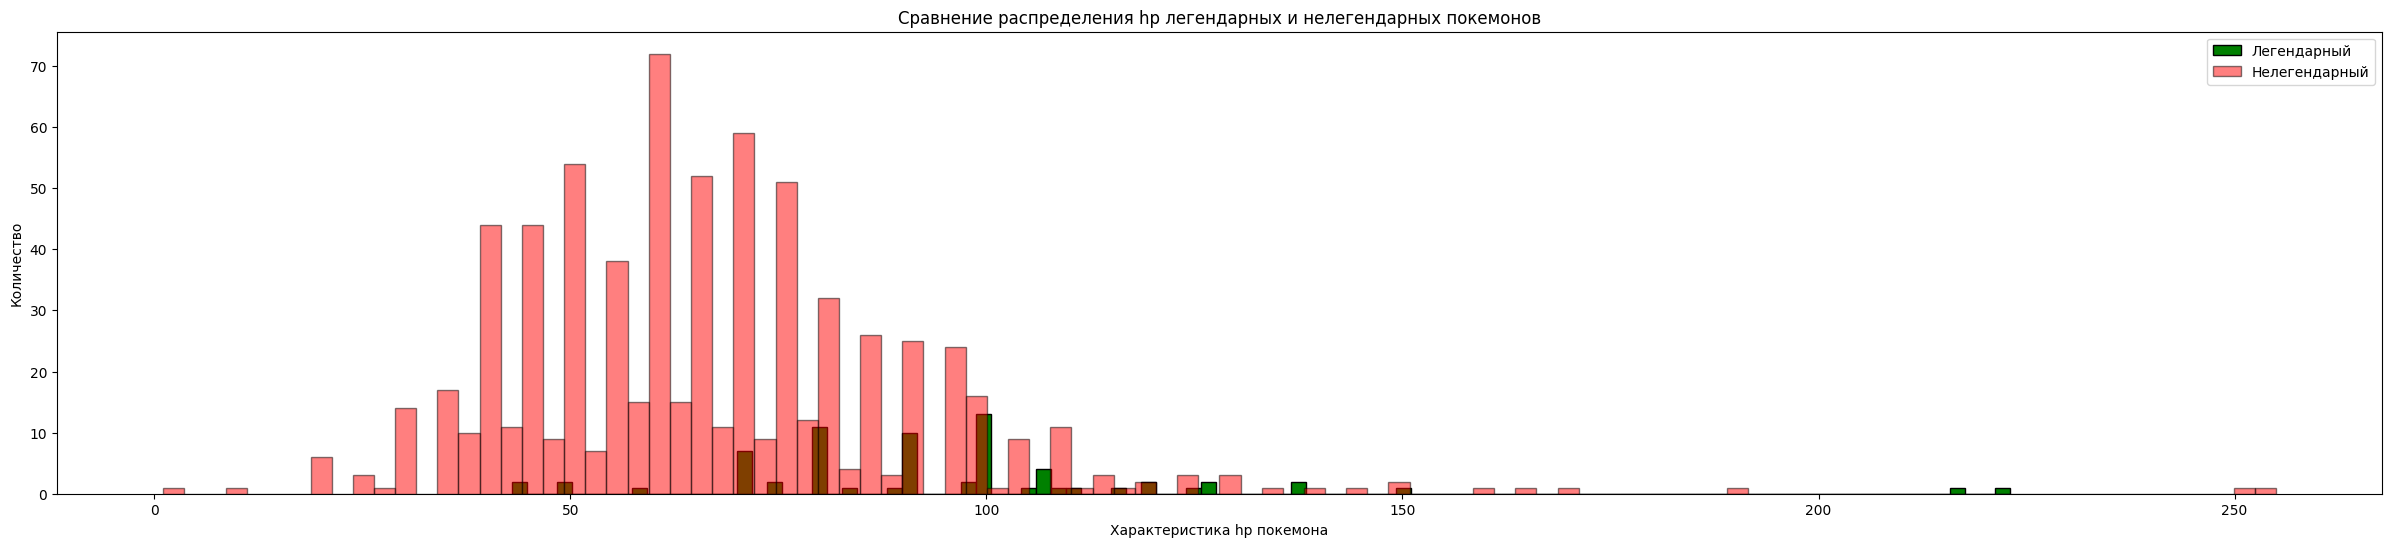

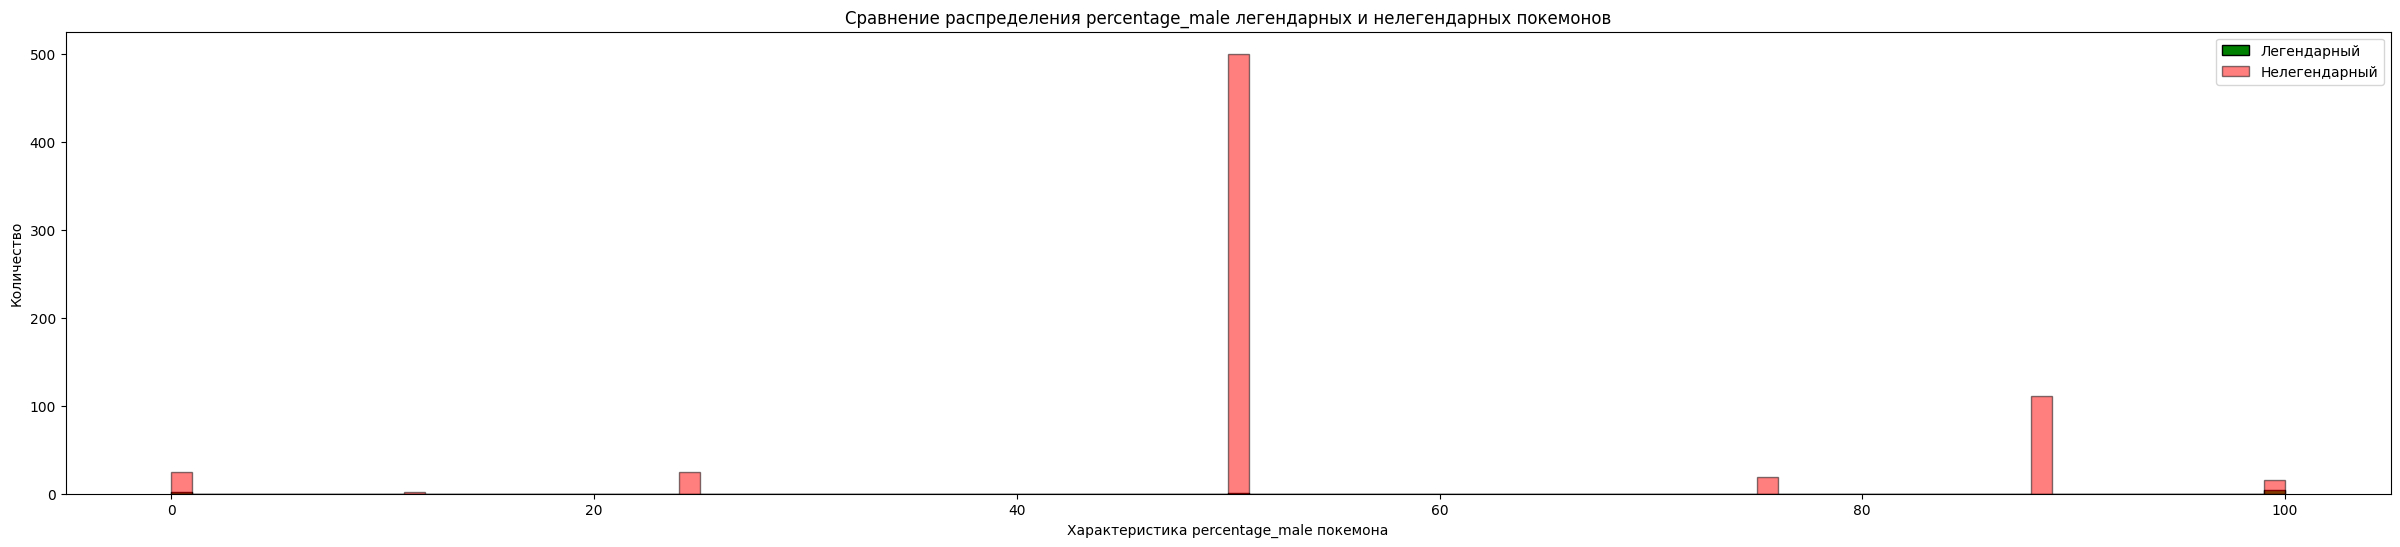

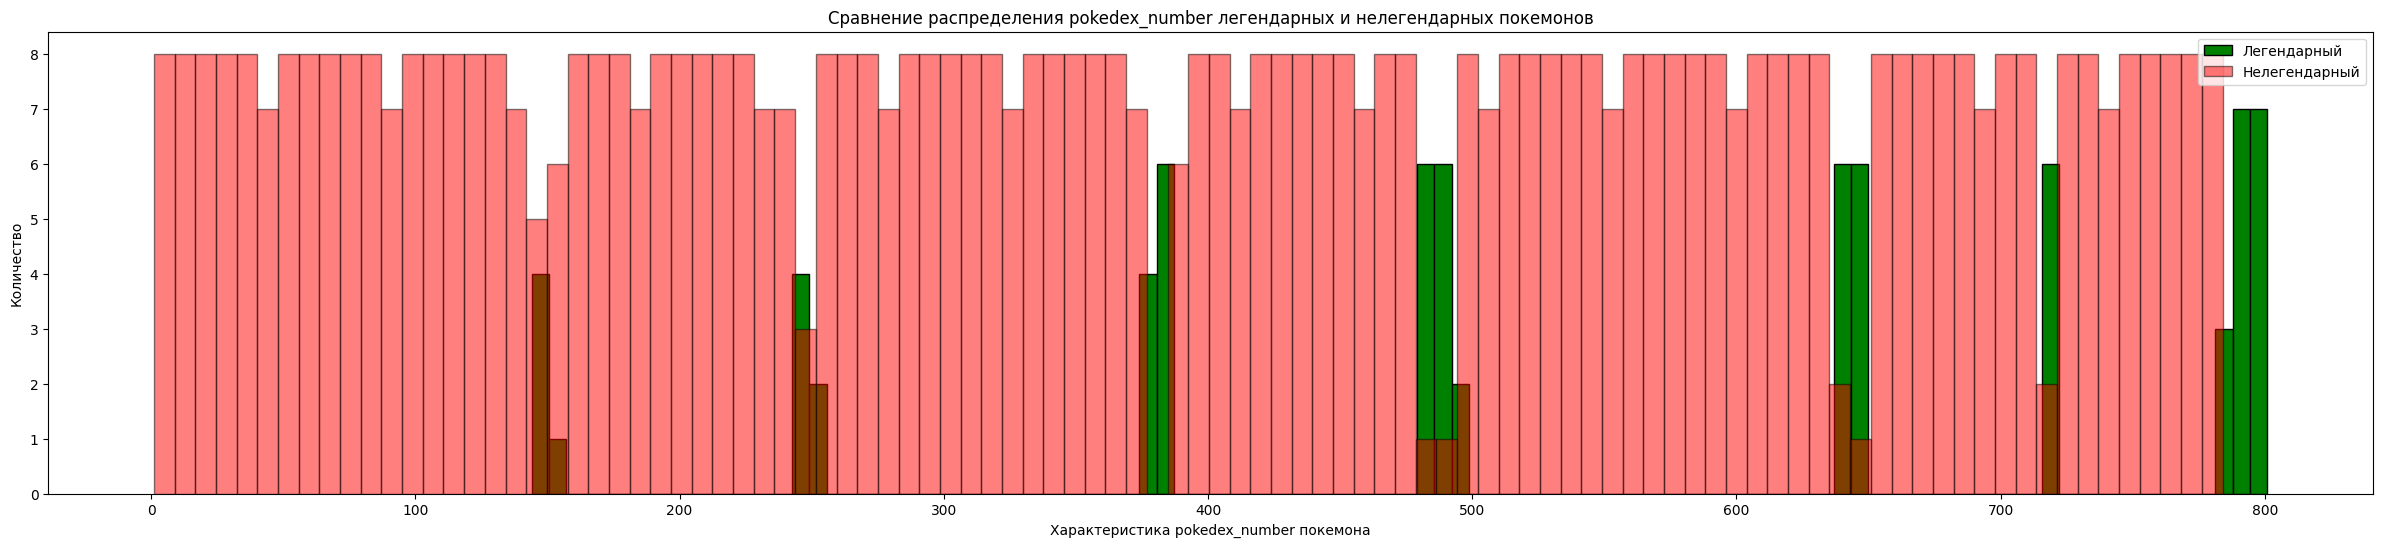

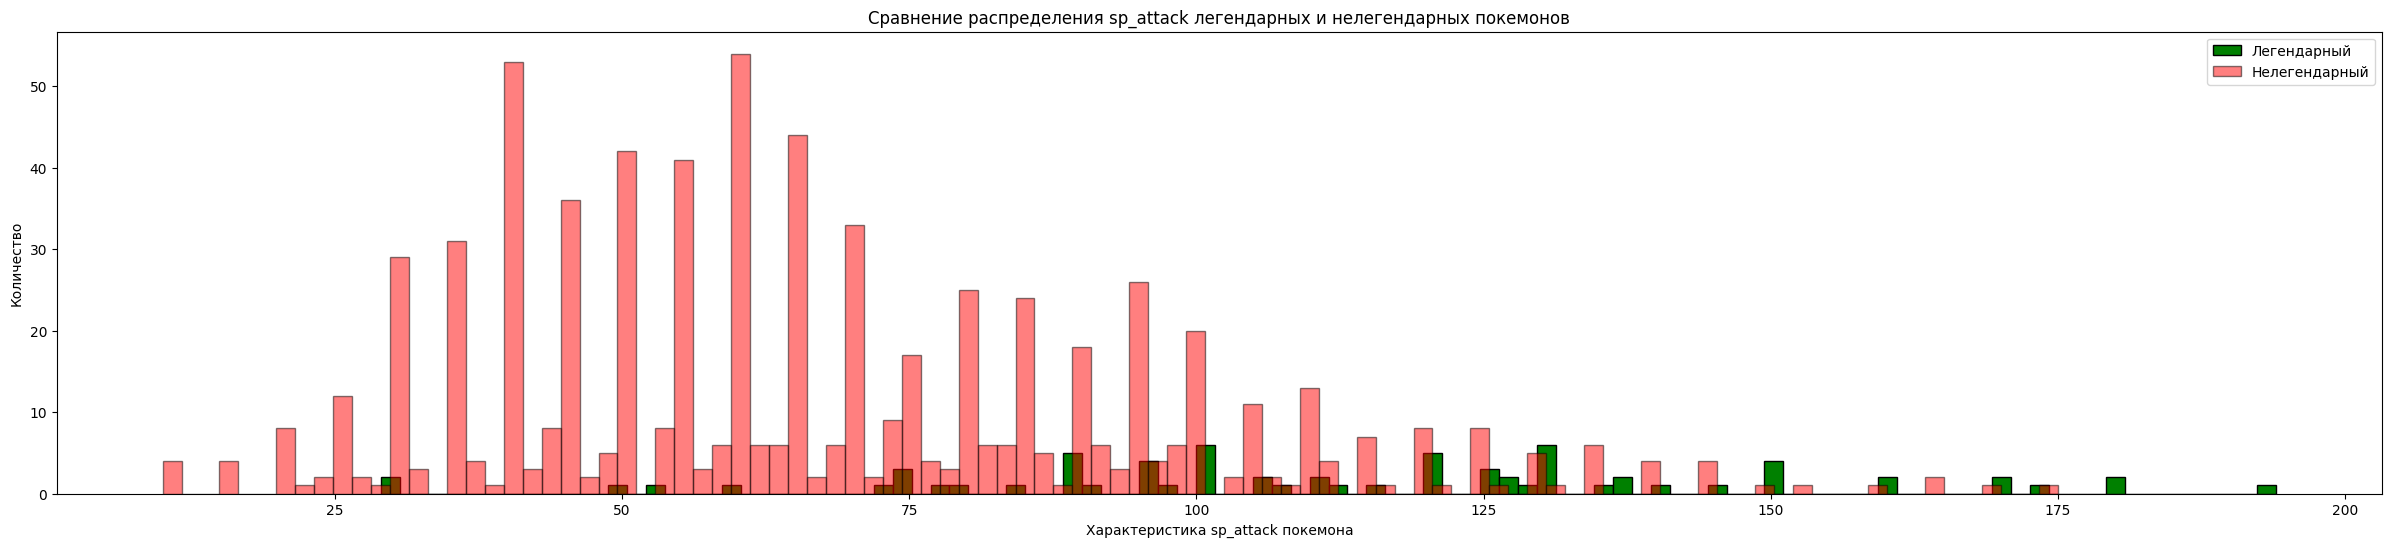

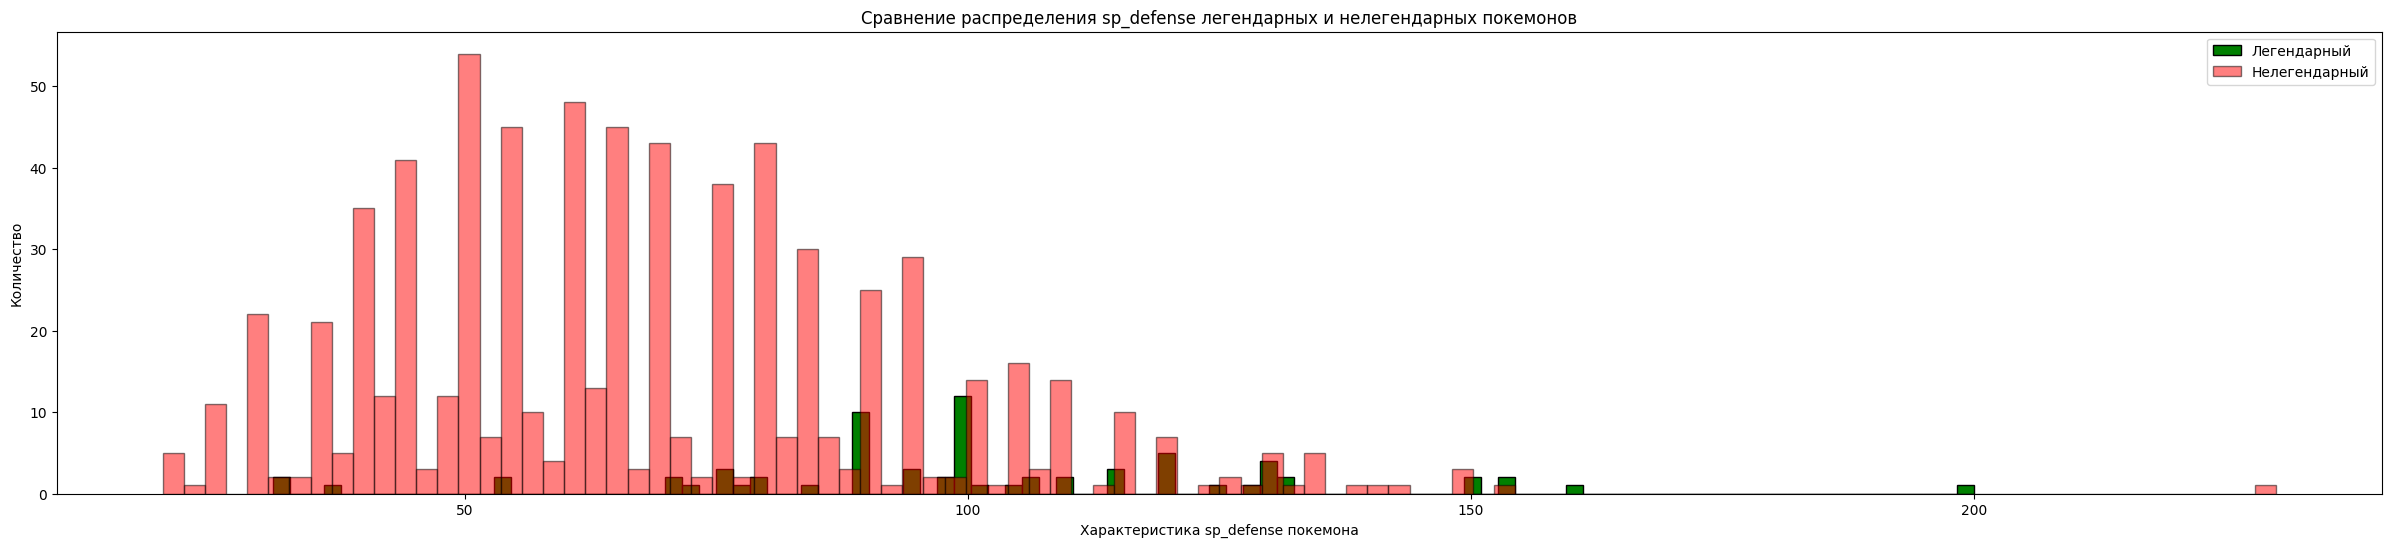

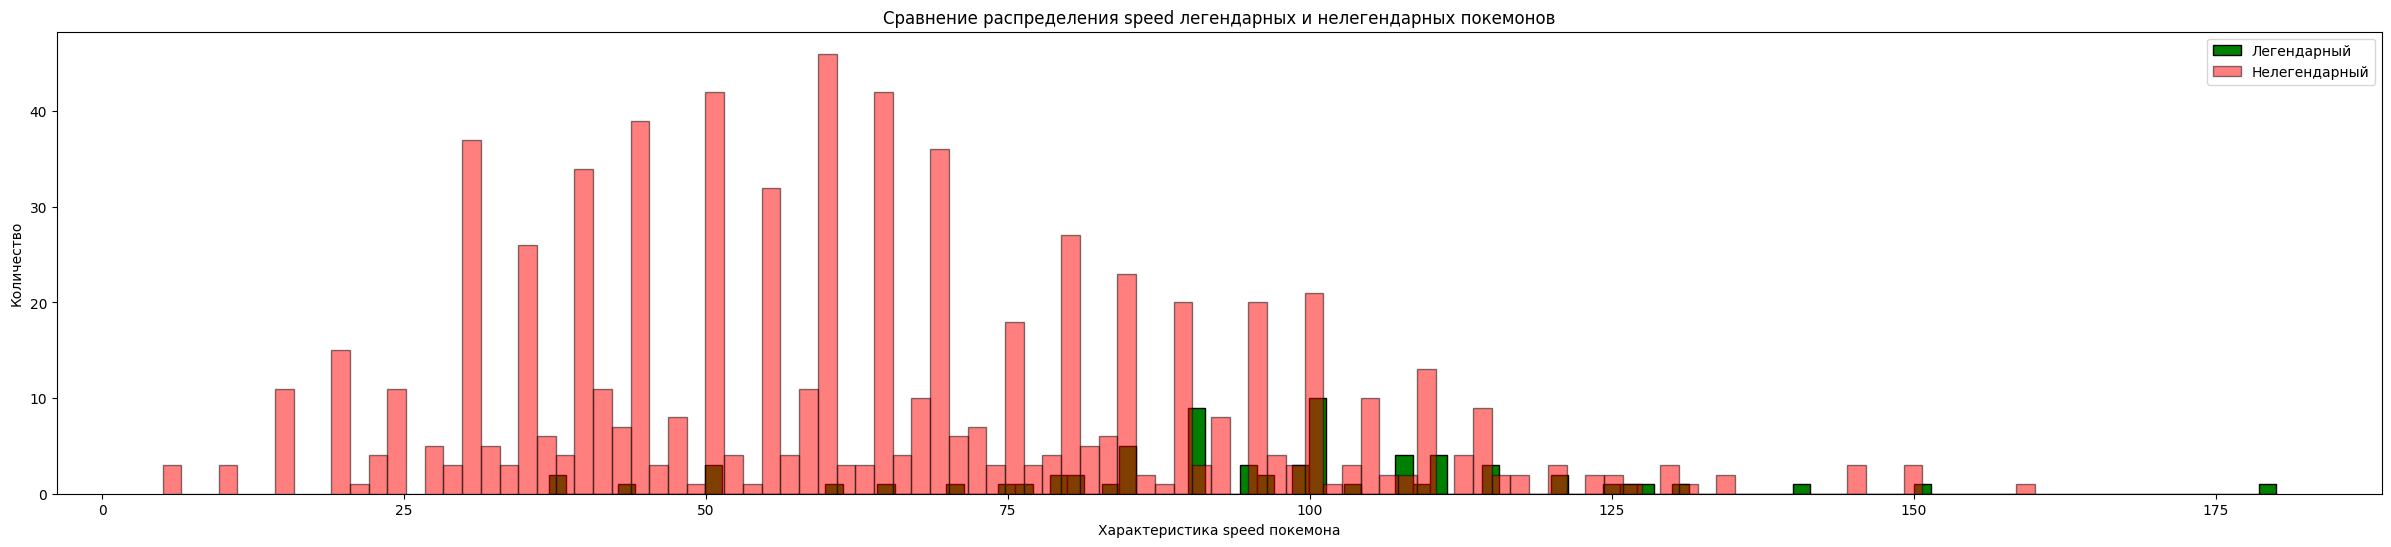

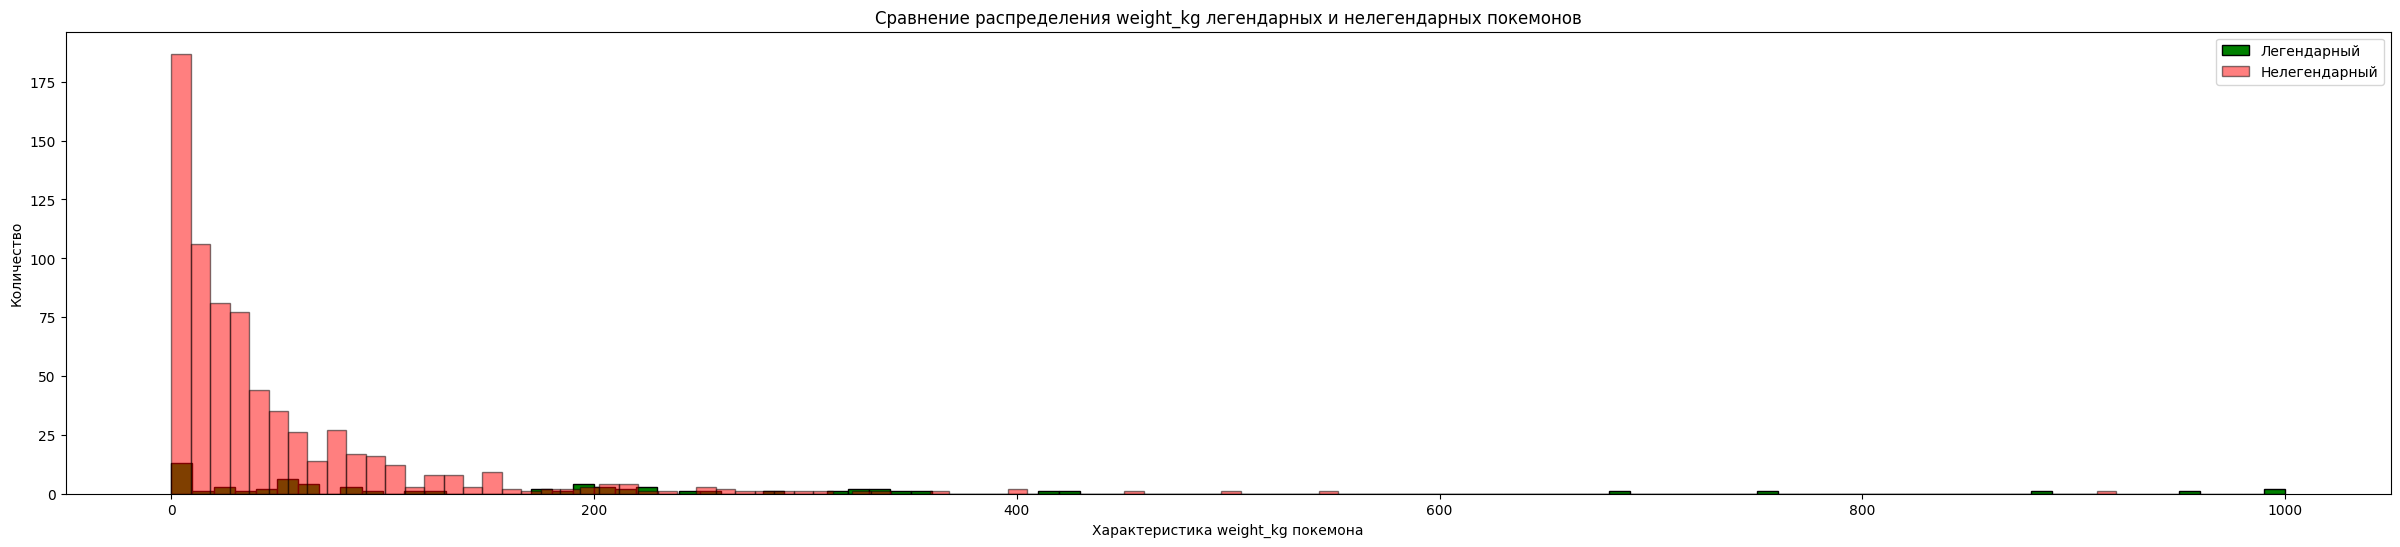

In [5]:
legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]
num_column = data.columns

for column in num_column[1:-1]:
    if column not in ['classfication','type1', 'type2', 'generation', 'name', 'japanese_name']:
        number(data, legend_pokemons, no_legend_pokemons, column)